# Lectura de datos

In [119]:
import pandas as pd
import numpy as np
import itertools
import ast
import json

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.preprocessing import KBinsDiscretizer

In [120]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", 100)
pd.set_option('display.float_format', lambda x: "{:,.2f}".format(x))

%config InlineBackend.figure_format = 'retina'

In [121]:
train_default = pd.read_csv('/Users/gblasd/Documents/DataScience/02_SupervisedLearning/data/Examen_1/train_default.csv', delimiter='|')
train_default.shape

(5625, 25)

In [122]:
train_default.sample(5)

,CUSTOMER_ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
5007,26977,"210,000.00",2,3,2,36,0,0,0,0,0,0,"203,447.00","206,683.00","99,411.00","63,322.00","73,433.00","75,381.00","6,549.00","4,500.00","2,407.00","12,700.00","3,200.00","4,000.00",0
5433,20106,"290,000.00",2,2,2,28,0,0,0,0,0,0,"133,789.00","137,875.00","124,871.00","118,193.00","121,283.00","124,109.00","6,300.00","6,000.00","5,000.00","5,000.00","5,000.00","5,000.00",0
487,11231,"170,000.00",2,1,2,26,0,0,0,0,0,0,"172,523.00","164,962.00","169,636.00","152,603.00","114,885.00","105,735.00","8,000.00","9,000.00","5,800.00","3,505.00","3,500.00","3,300.00",0
3716,4856,"200,000.00",2,1,2,29,0,0,0,0,0,0,"194,241.00","193,425.00","196,537.00","195,268.00","192,829.00","192,499.00","12,000.00","8,500.00","7,000.00","10,000.00","10,000.00","10,000.00",0
3251,1598,"260,000.00",2,2,1,42,0,0,0,0,0,0,"35,215.00","31,889.00","26,299.00","27,804.00","25,809.00","27,052.00","2,500.00","3,000.00","3,000.00","2,500.00","2,500.00","2,000.00",0


# Análisis Exploratorio de Datos

In [123]:
train_default.describe(percentiles=[0.01, .25, .5, .75, .99]).T

,count,mean,std,min,1%,25%,50%,75%,99%,max
CUSTOMER_ID,"5,625.00","14,945.57","8,655.94",1.00,288.72,"7,494.00","14,901.00","22,503.00","29,654.28","30,000.00"
LIMIT_BAL,"5,625.00","164,279.11","127,919.46","10,000.00","10,000.00","50,000.00","140,000.00","230,000.00","500,000.00","750,000.00"
SEX,"5,625.00",1.61,0.49,1.00,1.00,1.00,2.00,2.00,2.00,2.00
EDUCATION,"5,625.00",1.85,0.80,0.00,1.00,1.00,2.00,2.00,5.00,6.00
MARRIAGE,"5,625.00",1.56,0.52,0.00,1.00,1.00,2.00,2.00,3.00,3.00
AGE,"5,625.00",35.32,9.24,21.00,22.00,28.00,34.00,41.00,60.00,75.00
PAY_0,"5,625.00",-0.01,1.14,-2.00,-2.00,-1.00,0.00,0.00,3.00,8.00
PAY_2,"5,625.00",-0.13,1.23,-2.00,-2.00,-1.00,0.00,0.00,3.00,8.00
PAY_3,"5,625.00",-0.17,1.22,-2.00,-2.00,-1.00,0.00,0.00,3.00,7.00
PAY_4,"5,625.00",-0.21,1.20,-2.00,-2.00,-1.00,0.00,0.00,3.00,7.00


# Ingeniería de Variables

In [124]:
train_default['default.payment.next.month'].value_counts(normalize=True)

default.payment.next.month
0   0.78
1   0.22
Name: proportion, dtype: float64

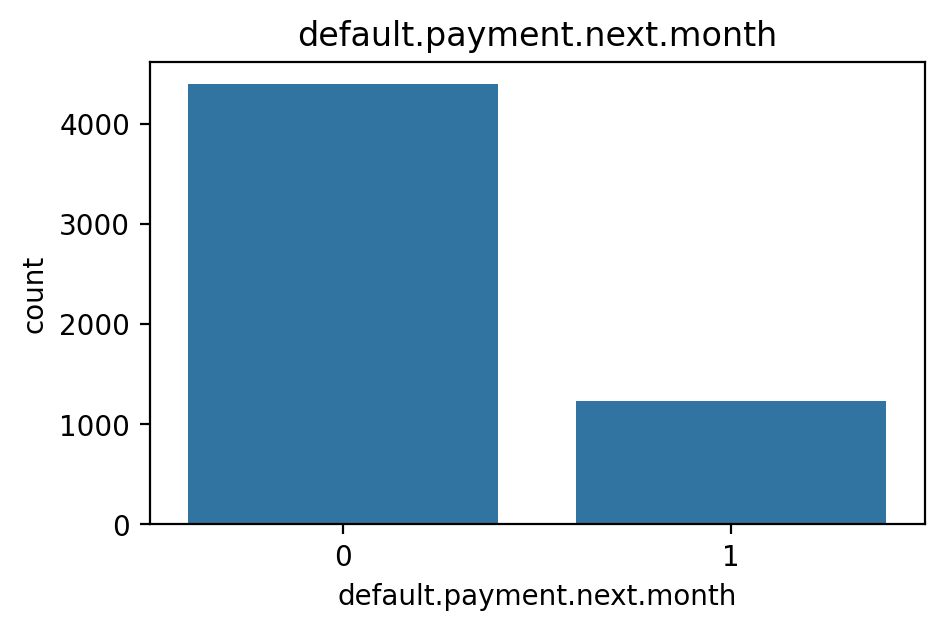

In [125]:
plt.figure(figsize=(5,3))
sns.barplot(train_default['default.payment.next.month'].value_counts())
plt.title('default.payment.next.month')
plt.show()

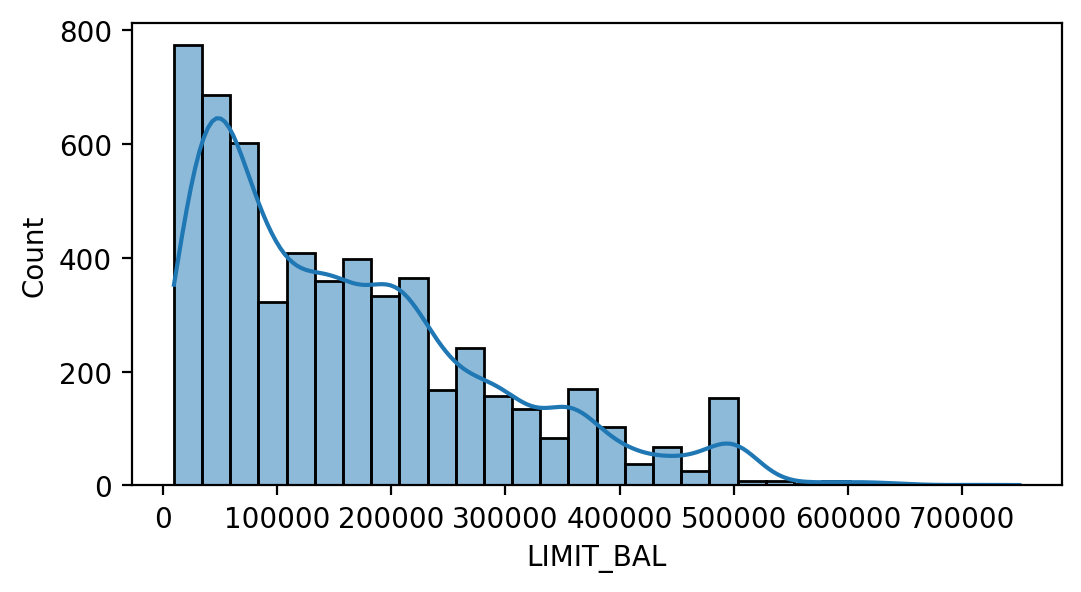

In [126]:
plt.figure(figsize=(6,3))
sns.histplot(train_default['LIMIT_BAL'],kde=True,bins=30)
plt.show()

<Figure size 600x300 with 0 Axes>

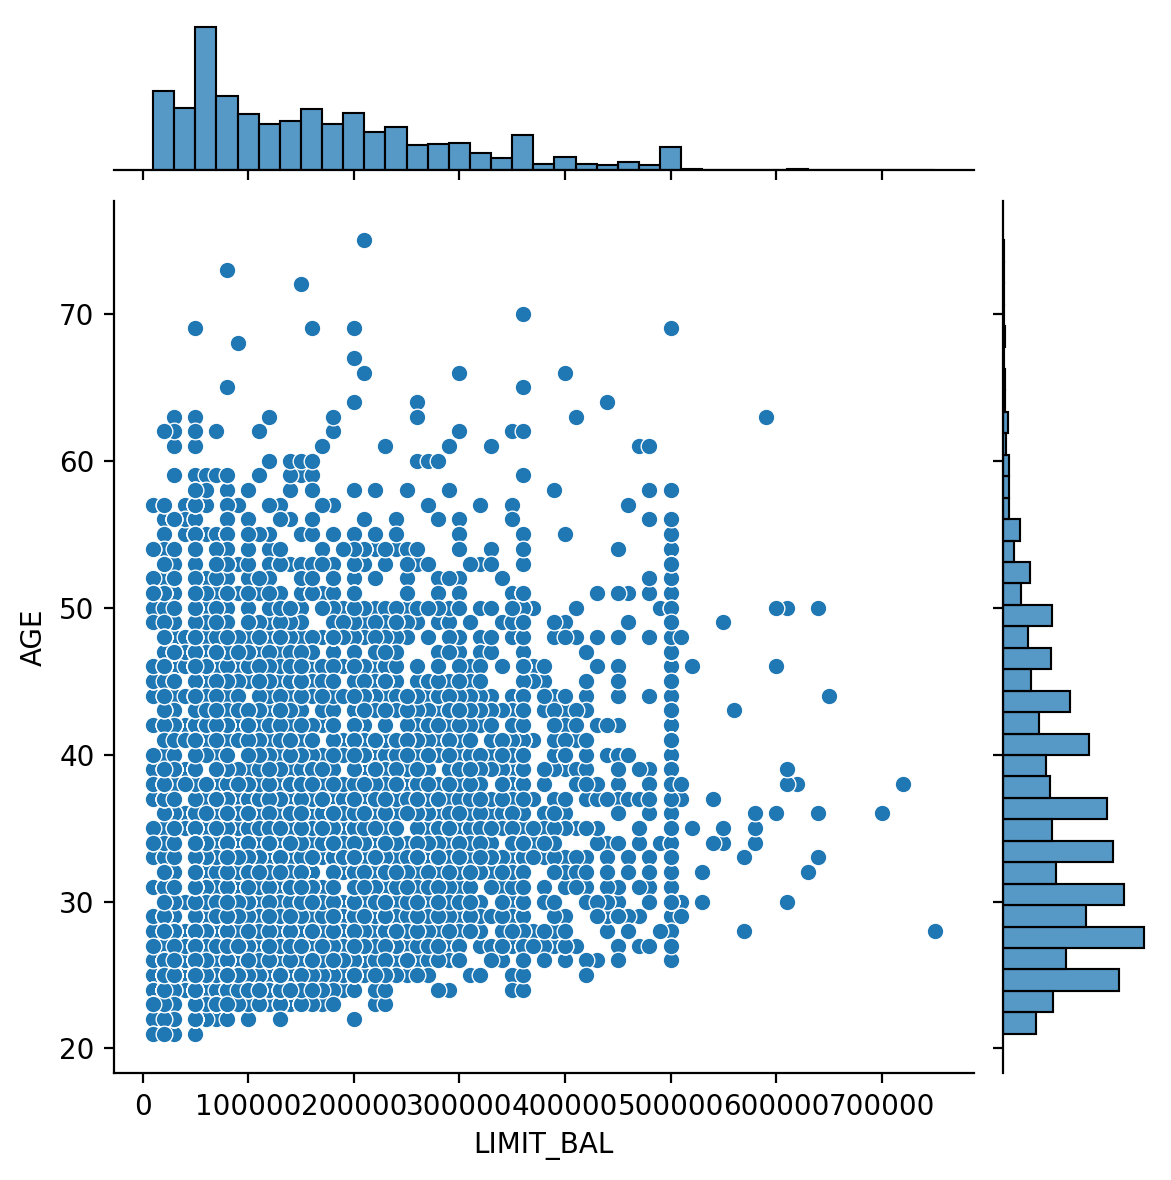

In [127]:
plt.figure(figsize=(6,3))
ax = sns.jointplot(x='LIMIT_BAL',y='AGE',data=train_default,kind="scatter")
plt.show()

In [128]:
train_default[['PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3', 'PAY_AMT2']].describe(percentiles=[0.01, .35, .5, .75, .98, .97, .99]).T

,count,mean,std,min,1%,35%,50%,75%,97%,98%,99%,max
PAY_AMT6,"5,625.00","5,354.91","18,867.06",0.00,0.00,696.40,"1,500.00","4,015.00","30,003.64","48,940.76","85,723.16","528,666.00"
PAY_AMT5,"5,625.00","4,840.99","16,561.48",0.00,0.00,710.40,"1,500.00","4,005.00","25,000.00","35,880.32","60,039.52","417,990.00"
PAY_AMT4,"5,625.00","4,589.50","13,981.75",0.00,0.00,714.80,"1,500.00","4,000.00","24,362.64","37,126.48","61,900.00","330,982.00"
PAY_AMT3,"5,625.00","4,928.85","14,177.63",0.00,0.00,"1,000.00","1,742.00","4,478.00","27,026.68","36,316.40","60,985.84","325,000.00"
PAY_AMT2,"5,625.00","5,985.49","24,139.35",0.00,0.00,"1,405.40","2,019.00","5,000.00","28,211.96","40,852.64","73,862.56","1,227,082.00"


In [129]:
#train_default = train_default[train_default['PAY_AMT6'] < train_default['PAY_AMT6'].quantile(.99)]
#train_default = train_default[train_default['PAY_AMT5'] < train_default['PAY_AMT5'].quantile(.99)]
#train_default = train_default[train_default['PAY_AMT4'] < train_default['PAY_AMT4'].quantile(.99)]
#train_default = train_default[train_default['PAY_AMT3'] < train_default['PAY_AMT3'].quantile(.99)]
#train_default = train_default[train_default['PAY_AMT2'] < train_default['PAY_AMT2'].quantile(.99)]

# Ingenieria de Variables

In [130]:
# (1=preparatoria, 2=universidad, 3=secundaria, 4=otros, 5=desconocido, 6=desconocido, 0=nulo)
display(train_default['EDUCATION'].value_counts().sort_index())
train_default['EDUCATION'].replace({4:0,5:0,6:0}, inplace=True) # clasificacion de valores desconocido
train_default['EDUCATION'].replace({3:2, 2:3}, inplace=True) # cambiamos el orden de los valores, para darle mas peso
display(train_default['EDUCATION'].value_counts().sort_index())

EDUCATION
0       5
1    1979
2    2657
3     895
4      19
5      57
6      13
Name: count, dtype: int64

EDUCATION
0      94
1    1979
2     895
3    2657
Name: count, dtype: int64

In [131]:
# * MARRIAGE: Estatus marital (1=casado, 2=soltero, 3=otros, 0=nulo)
display(train_default['MARRIAGE'].value_counts().sort_index())
train_default['MARRIAGE'].replace({0:2, 3:2}, inplace=True)
display(train_default['MARRIAGE'].value_counts().sort_index())

MARRIAGE
0      10
1    2508
2    3041
3      66
Name: count, dtype: int64

MARRIAGE
1    2508
2    3117
Name: count, dtype: int64

In [132]:
train_default['SEX'] = train_default['SEX'].astype(str)
train_default['EDUCATION'] = train_default['EDUCATION'].astype(str)
train_default['MARRIAGE'] = train_default['MARRIAGE'].astype(str)

In [133]:
train_default[['PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3', 'PAY_AMT2']].describe(percentiles=[0.01, .25, .5, .75, .9, .99]).T

,count,mean,std,min,1%,25%,50%,75%,90%,99%,max
PAY_AMT6,"5,625.00","5,354.91","18,867.06",0.00,0.00,10.00,"1,500.00","4,015.00","9,743.00","85,723.16","528,666.00"
PAY_AMT5,"5,625.00","4,840.99","16,561.48",0.00,0.00,190.00,"1,500.00","4,005.00","9,061.00","60,039.52","417,990.00"
PAY_AMT4,"5,625.00","4,589.50","13,981.75",0.00,0.00,296.00,"1,500.00","4,000.00","9,105.40","61,900.00","330,982.00"
PAY_AMT3,"5,625.00","4,928.85","14,177.63",0.00,0.00,390.00,"1,742.00","4,478.00","9,965.60","60,985.84","325,000.00"
PAY_AMT2,"5,625.00","5,985.49","24,139.35",0.00,0.00,848.00,"2,019.00","5,000.00","10,439.00","73,862.56","1,227,082.00"


In [134]:
train_default[ 'Num_Meses_Con_Retraso' ] = train_default[['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2']].apply(lambda row: (row > 0).sum(), axis=1)
train_default[ 'Max_Meses_Con_Retraso' ] = train_default[['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2']].apply(lambda row: max(list(filter(lambda x: x > 0, row)), default=0), axis=1)
train_default[ 'Max_Retraso_Reciente' ] = train_default[['PAY_3', 'PAY_2']].apply(lambda row: max(list(filter(lambda x: x > 0,row)), default=0), axis=1)

lst_var_1 = ['Num_Meses_Con_Retraso', 'Max_Meses_Con_Retraso', 'Max_Retraso_Reciente']
# orden de los meses y total de meses de retraso en el pago
train_default[ ['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2'] + lst_var_1 ].sample(5)

,PAY_6,PAY_5,PAY_4,PAY_3,PAY_2,Num_Meses_Con_Retraso,Max_Meses_Con_Retraso,Max_Retraso_Reciente
770,0,0,0,2,0,1,2,2
3159,-1,-1,-1,0,0,0,0,0
1020,-2,-2,-2,-2,-2,0,0,0
3542,0,0,0,0,0,0,0,0
4068,0,0,0,0,-1,0,0,0


In [135]:
train_default[['BILL_AMT6','BILL_AMT5','BILL_AMT4','BILL_AMT3','BILL_AMT2']].sample(5)

,BILL_AMT6,BILL_AMT5,BILL_AMT4,BILL_AMT3,BILL_AMT2
2604,"286,837.00","284,915.00","277,270.00","273,333.00","279,307.00"
2087,"355,339.00","330,982.00",0.00,0.00,0.00
4842,"29,066.00","28,479.00","28,042.00","7,114.00","28,251.00"
2848,"19,501.00","22,895.00","49,671.00","48,762.00","50,361.00"
571,"25,707.00","25,887.00","30,097.00","30,419.00","29,144.00"


In [136]:
train_default[ 'Promedio_Deuda_Ultimos_3_Meses' ] = train_default[['BILL_AMT2','BILL_AMT3','BILL_AMT4']].apply(lambda row: row.mean(), axis=1)
train_default[ 'Cambio_Deuda_Reciente' ] = train_default[['BILL_AMT2','BILL_AMT3','BILL_AMT4']].apply(lambda row: row['BILL_AMT2'] - row['BILL_AMT3'], axis=1)
train_default[ 'Suma_Deuda_Total_Historica' ] = train_default[['BILL_AMT2','BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].apply(lambda row: row.sum(), axis=1)
train_default[ 'Max_Deuda_Historica' ] = train_default[['BILL_AMT2','BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].apply(lambda row: row.max(), axis=1)
train_default[ 'Utilizacion_Credito_Actual' ] = train_default.apply(lambda row: (row['BILL_AMT1'] / row['LIMIT_BAL'])*100*row['LIMIT_BAL'], axis=1)
train_default[ 'Prom_porcen_uso_Credito_Actual' ] = train_default.apply(lambda row: (row['BILL_AMT1'] / row['LIMIT_BAL'])*100, axis=1)
train_default[ 'Utilizacion_Credito_Promedio' ] = train_default.apply(lambda row: (row[['BILL_AMT2','BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum()/ row['LIMIT_BAL']*5)*100 , axis=1)

In [137]:
lst_var_2 = ['Promedio_Deuda_Ultimos_3_Meses', 'Cambio_Deuda_Reciente', 'Suma_Deuda_Total_Historica', 'Max_Deuda_Historica',
                'Utilizacion_Credito_Actual', 'Prom_porcen_uso_Credito_Actual', 'Utilizacion_Credito_Promedio']
train_default[['LIMIT_BAL', 'BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 'BILL_AMT3', 'BILL_AMT2', 'BILL_AMT1'] + lst_var_2].sample(5)

,LIMIT_BAL,BILL_AMT6,BILL_AMT5,BILL_AMT4,BILL_AMT3,BILL_AMT2,BILL_AMT1,Promedio_Deuda_Ultimos_3_Meses,Cambio_Deuda_Reciente,Suma_Deuda_Total_Historica,Max_Deuda_Historica,Utilizacion_Credito_Actual,Prom_porcen_uso_Credito_Actual,Utilizacion_Credito_Promedio
635,"200,000.00",0.00,0.00,"1,599.00","1,192.00",169.00,0.00,986.67,"-1,023.00","2,960.00","1,599.00",0.00,0.00,7.40
4752,"280,000.00","111,447.00","109,065.00","108,253.00","111,510.00","108,711.00","106,341.00","109,491.33","-2,799.00","548,986.00","111,510.00","10,634,100.00",37.98,980.33
5133,"140,000.00","95,100.00","98,924.00","98,147.00","133,250.00","137,950.00","139,445.00","123,115.67","4,700.00","563,371.00","137,950.00","13,944,500.00",99.60,"2,012.04"
713,"50,000.00",350.00,349.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,696.00,350.00,-100.00,-0.00,6.96
4069,"100,000.00","40,005.00","50,859.00","58,433.00","64,930.00","74,621.00","84,196.00","65,994.67","9,691.00","288,848.00","74,621.00","8,419,600.00",84.20,"1,444.24"


In [138]:
train_default[['PAY_AMT6','PAY_AMT5','PAY_AMT4','PAY_AMT3','PAY_AMT2']].sample(5)

,PAY_AMT6,PAY_AMT5,PAY_AMT4,PAY_AMT3,PAY_AMT2
5279,"1,333.00","1,320.00","1,426.00","2,000.00","1,564.00"
1594,650.00,"1,000.00",762.00,"1,400.00","2,058.00"
345,"2,000.00","1,000.00","1,000.00","2,000.00","18,135.00"
518,500.00,500.00,"1,000.00","1,181.00","1,380.00"
1080,"8,981.00","15,165.00","5,000.00","5,170.00","10,000.00"


In [139]:
def get_mean_pay(row):
    m = []
    if row['PAY_AMT6'] > 0:
        m.append( row['BILL_AMT6']/row['PAY_AMT6'] )
    if row['PAY_AMT5'] > 0:
        m.append( row['BILL_AMT5']/row['PAY_AMT5'] )
    if row['PAY_AMT4'] > 0:
        m.append( row['BILL_AMT4']/row['PAY_AMT4'] )
    if row['PAY_AMT3'] > 0:
        m.append( row['BILL_AMT3']/row['PAY_AMT3'] )
    if row['PAY_AMT2'] > 0:
        m.append( row['BILL_AMT2']/row['PAY_AMT2'] )
    
    if len(m) != 0:
        return  sum(m) / len(m)
    
    return 0

In [140]:
train_default['Promedio_Pago_Ultimos_Meses'] = train_default[['PAY_AMT4','PAY_AMT3','PAY_AMT2']].apply(lambda row: row.sum()/3, axis=1)
train_default['Suma_Pagos_Historicos'] = train_default[['PAY_AMT6','PAY_AMT5','PAY_AMT4','PAY_AMT3','PAY_AMT2']].apply(lambda row: row.sum(), axis=1)
train_default['Prom_Porcentaje_Pagos_Historicos'] = train_default.apply(lambda row: get_mean_pay(row=row), axis=1)
train_default['Cambio_Pago_Reciente'] = train_default.apply(lambda row: row['PAY_AMT2'] - row['PAY_AMT3'], axis=1)

train_default['Ratio_Pago_Factura_Anterior'] = np.where(train_default['BILL_AMT2'] > 0, (train_default['PAY_AMT2'] / train_default['BILL_AMT2'])*100, 0)

In [141]:
lst_var_3 = ['Promedio_Pago_Ultimos_Meses', 'Suma_Pagos_Historicos', 'Prom_Porcentaje_Pagos_Historicos',
             'Cambio_Pago_Reciente', 'Ratio_Pago_Factura_Anterior']
train_default[['PAY_AMT6','PAY_AMT5','PAY_AMT4','PAY_AMT3','PAY_AMT2'] + lst_var_3].sample(5)

,PAY_AMT6,PAY_AMT5,PAY_AMT4,PAY_AMT3,PAY_AMT2,Promedio_Pago_Ultimos_Meses,Suma_Pagos_Historicos,Prom_Porcentaje_Pagos_Historicos,Cambio_Pago_Reciente,Ratio_Pago_Factura_Anterior
2852,"11,961.00","4,486.00","1,455.00","1,411.00",0.00,955.33,"19,313.00",0.42,"-1,411.00",0.00
2288,"3,104.00","14,000.00","1,000.00","1,005.00","5,011.00","2,338.67","24,120.00",20.83,"4,006.00",8.62
3575,0.00,0.00,780.00,0.00,"2,300.00","1,026.67","3,080.00",1.10,"2,300.00",45.45
4293,"8,000.00","186,732.00","8,246.00","8,201.00","7,017.00","7,821.33","218,196.00",18.43,"-1,184.00",3.86
1418,"2,001.00","5,795.00","3,012.00",809.00,"2,190.00","2,003.67","13,807.00",20.81,"1,381.00",4.33


In [142]:
train_default[ 'Edad_x_Limite_Credito' ] = train_default.apply(lambda row: row['AGE'] * row['LIMIT_BAL'], axis=1)

In [143]:
lst_var_4 = ['Edad_x_Limite_Credito']
train_default[['AGE', 'LIMIT_BAL'] + lst_var_4].sample(5)

,AGE,LIMIT_BAL,Edad_x_Limite_Credito
2493,31,"160,000.00","4,960,000.00"
865,25,"50,000.00","1,250,000.00"
4683,39,"160,000.00","6,240,000.00"
2651,33,"130,000.00","4,290,000.00"
3175,47,"500,000.00","23,500,000.00"


In [144]:
train_default['PAY_0'] = train_default['PAY_0'].map(lambda x: 1 if x > 0 else 0)
train_default['PAY_2'] = train_default['PAY_2'].map(lambda x: 1 if x > 0 else 0)
train_default['PAY_3'] = train_default['PAY_3'].map(lambda x: 1 if x > 0 else 0)
train_default['PAY_4'] = train_default['PAY_4'].map(lambda x: 1 if x > 0 else 0)
train_default['PAY_5'] = train_default['PAY_5'].map(lambda x: 1 if x > 0 else 0)
train_default['PAY_6'] = train_default['PAY_6'].map(lambda x: 1 if x > 0 else 0)


train_default['PAY_0'] = train_default['PAY_0'].astype(str)
train_default['PAY_2'] = train_default['PAY_2'].astype(str)
train_default['PAY_3'] = train_default['PAY_3'].astype(str)
train_default['PAY_4'] = train_default['PAY_4'].astype(str)
train_default['PAY_5'] = train_default['PAY_5'].astype(str)
train_default['PAY_6'] = train_default['PAY_6'].astype(str)

# Variables

In [145]:
# Unidad muestral
var_um = ['CUSTOMER_ID']

# Variables categoricas
var_cat = ['SEX', 'EDUCATION', 'MARRIAGE'
           ,'PAY_0', 'PAY_2',    'PAY_3',    'PAY_4',    'PAY_5',    'PAY_6']

# Variables numericas
var_num = ['LIMIT_BAL','AGE',
           'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
           'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
             # 'PAY_0'
             #          'PAY_2',    'PAY_3',    'PAY_4',    'PAY_5',    'PAY_6'
            ] + lst_var_1 + lst_var_2 + lst_var_3 + lst_var_4

var_tgt = ['default.payment.next.month']

print( len( var_um + var_cat + var_num + var_tgt ) )
print( train_default.shape )

41
(5625, 41)


In [146]:
def discretizar(df_aux, v, k):
    """
    Bin continuous data into intervals

    Args:
        df_aux: aux DataFrame.
        v: column of dataset
        k: n_bins

    Returns:
        DataFrame plus the column 'v' data into intervals.
    """

    kb = KBinsDiscretizer(
        n_bins=k,
        encode='ordinal',
        strategy='quantile',
        subsample=None
    )

    aux_df = df_aux.copy() # para evitar warnings

    # Asegura que el dato es numerico y no existe nan o null
    aux_df[v] = pd.to_numeric( aux_df[v], errors='coerce' )
    aux_df = aux_df.dropna( subset=[v] )

    # ajustar discretizer
    kb.fit( aux_df[[v]] )

    # obtiene intervalos como strings
    v_bins = kb.bin_edges_[0] # obtiene el numero de bins

    # Agrega en el DataFrame la columna generada
    aux_df[f"d_{v}_{k}"] = pd.cut( aux_df[v],
                                  bins=v_bins,
                                  include_lowest=True).astype(str)
    
    return aux_df

In [147]:
def calculo_iv(df, v, tgt, um):
    aux = df.pivot_table(
        index = v,
        columns = tgt,
        values = um[0],
        aggfunc = 'count',
        fill_value = 0
    )

    aux[ list( range(2) ) ] = aux / aux.apply( np.sum )

    aux['w'] = np.log( aux[0] / aux[1] )

    aux['iv'] = (  aux[0] - aux[1] ) * aux['w']

    return v, aux['iv'].sum()

In [148]:
for v in var_num:
    for k in range( 2, 6 ):
        # If k is higher than unique values in the column 'v'
        if train_default[v].nunique() < k:
            print(f"Saltando {v} con {k} bins porque tiene pocos valores unicos")
            continue
        print(f"Para la variable {v} con {k} bins.")
        train_default = discretizar( train_default, v, k )

Para la variable LIMIT_BAL con 2 bins.
Para la variable LIMIT_BAL con 3 bins.
Para la variable LIMIT_BAL con 4 bins.
Para la variable LIMIT_BAL con 5 bins.
Para la variable AGE con 2 bins.
Para la variable AGE con 3 bins.
Para la variable AGE con 4 bins.
Para la variable AGE con 5 bins.
Para la variable BILL_AMT1 con 2 bins.
Para la variable BILL_AMT1 con 3 bins.
Para la variable BILL_AMT1 con 4 bins.
Para la variable BILL_AMT1 con 5 bins.
Para la variable BILL_AMT2 con 2 bins.
Para la variable BILL_AMT2 con 3 bins.
Para la variable BILL_AMT2 con 4 bins.
Para la variable BILL_AMT2 con 5 bins.
Para la variable BILL_AMT3 con 2 bins.
Para la variable BILL_AMT3 con 3 bins.
Para la variable BILL_AMT3 con 4 bins.
Para la variable BILL_AMT3 con 5 bins.
Para la variable BILL_AMT4 con 2 bins.
Para la variable BILL_AMT4 con 3 bins.
Para la variable BILL_AMT4 con 4 bins.
Para la variable BILL_AMT4 con 5 bins.
Para la variable BILL_AMT5 con 2 bins.
Para la variable BILL_AMT5 con 3 bins.
Para la va

In [149]:
# Save the discretized variables
vari = train_default.filter( like='d_' ).columns.tolist()
vari = [ _ for _ in vari if _ not in ['Edad_x_Limite_Credito'] ]
vari

['d_LIMIT_BAL_2',
 'd_LIMIT_BAL_3',
 'd_LIMIT_BAL_4',
 'd_LIMIT_BAL_5',
 'd_AGE_2',
 'd_AGE_3',
 'd_AGE_4',
 'd_AGE_5',
 'd_BILL_AMT1_2',
 'd_BILL_AMT1_3',
 'd_BILL_AMT1_4',
 'd_BILL_AMT1_5',
 'd_BILL_AMT2_2',
 'd_BILL_AMT2_3',
 'd_BILL_AMT2_4',
 'd_BILL_AMT2_5',
 'd_BILL_AMT3_2',
 'd_BILL_AMT3_3',
 'd_BILL_AMT3_4',
 'd_BILL_AMT3_5',
 'd_BILL_AMT4_2',
 'd_BILL_AMT4_3',
 'd_BILL_AMT4_4',
 'd_BILL_AMT4_5',
 'd_BILL_AMT5_2',
 'd_BILL_AMT5_3',
 'd_BILL_AMT5_4',
 'd_BILL_AMT5_5',
 'd_BILL_AMT6_2',
 'd_BILL_AMT6_3',
 'd_BILL_AMT6_4',
 'd_BILL_AMT6_5',
 'd_PAY_AMT1_2',
 'd_PAY_AMT1_3',
 'd_PAY_AMT1_4',
 'd_PAY_AMT1_5',
 'd_PAY_AMT2_2',
 'd_PAY_AMT2_3',
 'd_PAY_AMT2_4',
 'd_PAY_AMT2_5',
 'd_PAY_AMT3_2',
 'd_PAY_AMT3_3',
 'd_PAY_AMT3_4',
 'd_PAY_AMT3_5',
 'd_PAY_AMT4_2',
 'd_PAY_AMT4_3',
 'd_PAY_AMT4_4',
 'd_PAY_AMT4_5',
 'd_PAY_AMT5_2',
 'd_PAY_AMT5_3',
 'd_PAY_AMT5_4',
 'd_PAY_AMT5_5',
 'd_PAY_AMT6_2',
 'd_PAY_AMT6_3',
 'd_PAY_AMT6_4',
 'd_PAY_AMT6_5',
 'd_Num_Meses_Con_Retraso_2',
 'd_Num_Me

In [150]:
# validate the proporcion of the bins
for v in vari:
    print(f"La variable: {v}")
    print(train_default[v].value_counts(True))
    print("\n")

La variable: d_LIMIT_BAL_2
d_LIMIT_BAL_2
(9999.999, 140000.0]   0.52
(140000.0, 750000.0]   0.48
Name: proportion, dtype: float64


La variable: d_LIMIT_BAL_3
d_LIMIT_BAL_3
(9999.999, 80000.0]    0.37
(80000.0, 200000.0]    0.32
(200000.0, 750000.0]   0.31
Name: proportion, dtype: float64


La variable: d_LIMIT_BAL_4
d_LIMIT_BAL_4
(50000.0, 140000.0]    0.26
(9999.999, 50000.0]    0.26
(230000.0, 750000.0]   0.25
(140000.0, 230000.0]   0.23
Name: proportion, dtype: float64


La variable: d_LIMIT_BAL_5
d_LIMIT_BAL_5
(9999.999, 50000.0]    0.26
(100000.0, 180000.0]   0.21
(260000.0, 750000.0]   0.20
(180000.0, 260000.0]   0.17
(50000.0, 100000.0]    0.16
Name: proportion, dtype: float64


La variable: d_AGE_2
d_AGE_2
(20.999, 34.0]   0.53
(34.0, 75.0]     0.47
Name: proportion, dtype: float64


La variable: d_AGE_3
d_AGE_3
(20.999, 29.0]   0.33
(38.333, 75.0]   0.33
(29.0, 38.333]   0.33
Name: proportion, dtype: float64


La variable: d_AGE_4
d_AGE_4
(20.999, 28.0]   0.28
(28.0, 34.0]   

### Mejores variables discretizadas

In [151]:
iv = pd.DataFrame( map( lambda v: calculo_iv( train_default, v, var_tgt, var_um ), vari ), columns=['variable', 'iv'])
iv

,variable,iv
0,d_LIMIT_BAL_2,0.12
1,d_LIMIT_BAL_3,0.14
2,d_LIMIT_BAL_4,0.15
3,d_LIMIT_BAL_5,0.14
4,d_AGE_2,0.00
5,d_AGE_3,0.00
6,d_AGE_4,0.01
7,d_AGE_5,0.01
8,d_BILL_AMT1_2,0.00
9,d_BILL_AMT1_3,0.00


In [152]:
iv['raiz'] = iv['variable'].map( lambda x: '_'.join( x.split('_')[1:-1] ) )
iv

,variable,iv,raiz
0,d_LIMIT_BAL_2,0.12,LIMIT_BAL
1,d_LIMIT_BAL_3,0.14,LIMIT_BAL
2,d_LIMIT_BAL_4,0.15,LIMIT_BAL
3,d_LIMIT_BAL_5,0.14,LIMIT_BAL
4,d_AGE_2,0.00,AGE
5,d_AGE_3,0.00,AGE
6,d_AGE_4,0.01,AGE
7,d_AGE_5,0.01,AGE
8,d_BILL_AMT1_2,0.00,BILL_AMT1
9,d_BILL_AMT1_3,0.00,BILL_AMT1


In [153]:
iv = iv.sort_values( by=['raiz', 'iv', 'variable'], 
                    ascending=[0, 0, 0] 
                    ).reset_index(drop=True)
iv = iv.loc[ iv['iv'] != np.inf ].reset_index(drop=True)
iv['id'] = iv.groupby('raiz').cumcount()+1
iv

,variable,iv,raiz,id
0,d_Utilizacion_Credito_Promedio_5,0.14,Utilizacion_Credito_Promedio,1
1,d_Utilizacion_Credito_Promedio_4,0.12,Utilizacion_Credito_Promedio,2
2,d_Utilizacion_Credito_Promedio_3,0.07,Utilizacion_Credito_Promedio,3
3,d_Utilizacion_Credito_Promedio_2,0.06,Utilizacion_Credito_Promedio,4
4,d_Utilizacion_Credito_Actual_5,0.01,Utilizacion_Credito_Actual,1
5,d_Utilizacion_Credito_Actual_3,0.00,Utilizacion_Credito_Actual,2
6,d_Utilizacion_Credito_Actual_4,0.00,Utilizacion_Credito_Actual,3
7,d_Utilizacion_Credito_Actual_2,0.00,Utilizacion_Credito_Actual,4
8,d_Suma_Pagos_Historicos_5,0.14,Suma_Pagos_Historicos,1
9,d_Suma_Pagos_Historicos_4,0.14,Suma_Pagos_Historicos,2


In [154]:
iv = iv[iv['id'] == 1].reset_index(drop=True)
iv

,variable,iv,raiz,id
0,d_Utilizacion_Credito_Promedio_5,0.14,Utilizacion_Credito_Promedio,1
1,d_Utilizacion_Credito_Actual_5,0.01,Utilizacion_Credito_Actual,1
2,d_Suma_Pagos_Historicos_5,0.14,Suma_Pagos_Historicos,1
3,d_Suma_Deuda_Total_Historica_5,0.02,Suma_Deuda_Total_Historica,1
4,d_Ratio_Pago_Factura_Anterior_4,0.10,Ratio_Pago_Factura_Anterior,1
5,d_Promedio_Pago_Ultimos_Meses_3,0.14,Promedio_Pago_Ultimos_Meses,1
6,d_Promedio_Deuda_Ultimos_3_Meses_5,0.01,Promedio_Deuda_Ultimos_3_Meses,1
7,d_Prom_porcen_uso_Credito_Actual_4,0.06,Prom_porcen_uso_Credito_Actual,1
8,d_Prom_Porcentaje_Pagos_Historicos_5,0.04,Prom_Porcentaje_Pagos_Historicos,1
9,d_PAY_AMT6_3,0.08,PAY_AMT6,1


In [155]:
besti = iv['variable'].tolist()
besti

['d_Utilizacion_Credito_Promedio_5',
 'd_Utilizacion_Credito_Actual_5',
 'd_Suma_Pagos_Historicos_5',
 'd_Suma_Deuda_Total_Historica_5',
 'd_Ratio_Pago_Factura_Anterior_4',
 'd_Promedio_Pago_Ultimos_Meses_3',
 'd_Promedio_Deuda_Ultimos_3_Meses_5',
 'd_Prom_porcen_uso_Credito_Actual_4',
 'd_Prom_Porcentaje_Pagos_Historicos_5',
 'd_PAY_AMT6_3',
 'd_PAY_AMT5_4',
 'd_PAY_AMT4_4',
 'd_PAY_AMT3_4',
 'd_PAY_AMT2_5',
 'd_PAY_AMT1_5',
 'd_Num_Meses_Con_Retraso_5',
 'd_Max_Retraso_Reciente_5',
 'd_Max_Meses_Con_Retraso_5',
 'd_Max_Deuda_Historica_5',
 'd_LIMIT_BAL_4',
 'd_Edad_x_Limite_Credito_5',
 'd_Cambio_Pago_Reciente_5',
 'd_Cambio_Deuda_Reciente_5',
 'd_BILL_AMT6_4',
 'd_BILL_AMT5_5',
 'd_BILL_AMT4_5',
 'd_BILL_AMT3_5',
 'd_BILL_AMT2_5',
 'd_BILL_AMT1_5',
 'd_AGE_4']

### Variables Discretas (Categoricas)

In [156]:
train_default[var_cat].describe()

,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,5625,5625,5625,5625,5625,5625,5625,5625,5625
unique,2,4,2,2,2,2,2,2,2
top,2,3,2,0,0,0,0,0,0
freq,3411,2657,3117,4325,4784,4845,4939,5037,5051


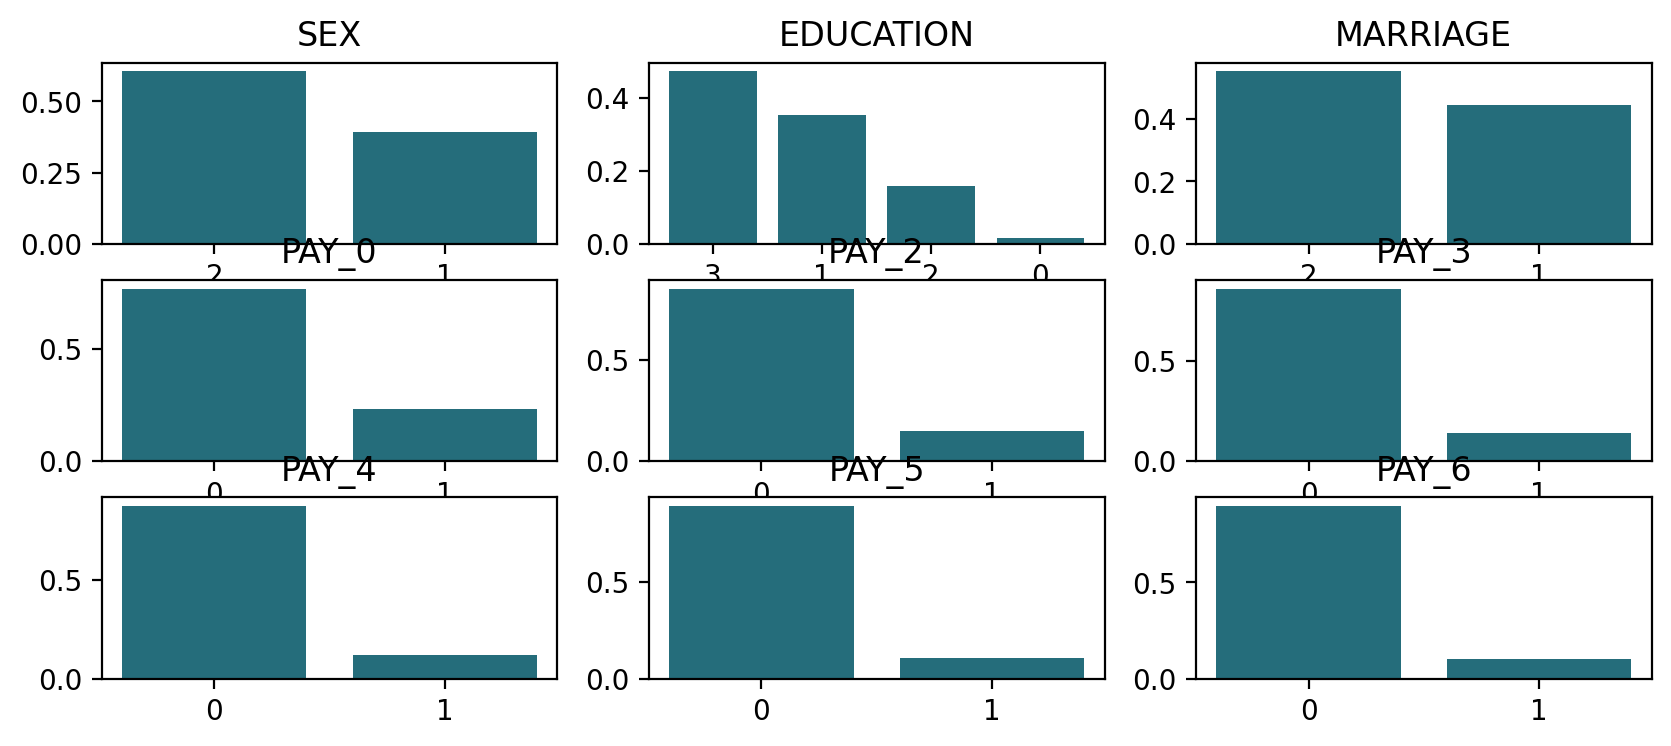

In [157]:
n_cols = 3
n_rows = 3

fig = plt.figure(figsize=(10, 4))
ax_array = fig.subplots(n_rows, n_cols, squeeze=False)

index_col = 0
for row in range(n_rows):
    for col in range(n_cols):
        pd_aux = pd.DataFrame(train_default[var_cat[index_col]].value_counts(normalize=True, dropna=False)).reset_index(drop=False)
        ax_array[row, col].bar(pd_aux[var_cat[index_col]], pd_aux['proportion'], color="#256D7B")
        # ax_array[row, col].hist(data[ls_disc[index_col]])
        ax_array[row, col].set_title(var_cat[index_col])
        index_col += 1
        # to avoid error, break loop
        if index_col >= len(var_cat):
            break

In [158]:
def freq(df, var):
    if type(var) != list:
        var = [var]
    for v in var:
        #v = 'state'
        aux = df[v].value_counts().to_frame().rename(columns={'count':'FA'})
        aux['FR'] = aux['FA'] / aux['FA'].sum()
        aux[['FAA','FRA']] = aux.apply(  np.cumsum )
        print(f"La variable: {v}")
        display(aux)
        print("\n")


In [159]:
# train_default['d_SEX'] = train_default['SEX']
# train_default['d_EDUCATION'] = train_default['EDUCATION']
# train_default['d_MARRIAGE'] = train_default['MARRIAGE']
# train_default['d_PAY_0'] = train_default['PAY_0']
# train_default['d_PAY_2'] = train_default['PAY_2']
# train_default['d_PAY_3'] = train_default['PAY_3']
# train_default['d_PAY_4'] = train_default['PAY_4']
# train_default['d_PAY_5'] = train_default['PAY_5']
# train_default['d_PAY_6'] = train_default['PAY_6']

# var_cat = ['d_SEX','d_EDUCATION','d_MARRIAGE','d_PAY_0','d_PAY_2','d_PAY_3','d_PAY_4','d_PAY_5','d_PAY_6']

In [160]:
iv2 = pd.DataFrame( map( lambda v: calculo_iv( train_default, v, var_tgt, var_um ), var_cat ), columns=['variable', 'iv'] )
iv2

,variable,iv
0,SEX,0.01
1,EDUCATION,0.04
2,MARRIAGE,0.00
3,PAY_0,0.64
4,PAY_2,0.49
5,PAY_3,0.44
6,PAY_4,0.38
7,PAY_5,0.35
8,PAY_6,0.27


In [161]:
iv = pd.concat( [iv, iv2], ignore_index=True )
iv

,variable,iv,raiz,id
0,d_Utilizacion_Credito_Promedio_5,0.14,Utilizacion_Credito_Promedio,1.00
1,d_Utilizacion_Credito_Actual_5,0.01,Utilizacion_Credito_Actual,1.00
2,d_Suma_Pagos_Historicos_5,0.14,Suma_Pagos_Historicos,1.00
3,d_Suma_Deuda_Total_Historica_5,0.02,Suma_Deuda_Total_Historica,1.00
4,d_Ratio_Pago_Factura_Anterior_4,0.10,Ratio_Pago_Factura_Anterior,1.00
5,d_Promedio_Pago_Ultimos_Meses_3,0.14,Promedio_Pago_Ultimos_Meses,1.00
6,d_Promedio_Deuda_Ultimos_3_Meses_5,0.01,Promedio_Deuda_Ultimos_3_Meses,1.00
7,d_Prom_porcen_uso_Credito_Actual_4,0.06,Prom_porcen_uso_Credito_Actual,1.00
8,d_Prom_Porcentaje_Pagos_Historicos_5,0.04,Prom_Porcentaje_Pagos_Historicos,1.00
9,d_PAY_AMT6_3,0.08,PAY_AMT6,1.00


In [162]:
iv = iv[['variable', 'iv']].sort_values( by='iv', ascending=False ).reset_index(drop=True)
iv

,variable,iv
0,PAY_0,0.64
1,d_Num_Meses_Con_Retraso_5,0.50
2,PAY_2,0.49
3,PAY_3,0.44
4,PAY_4,0.38
5,PAY_5,0.35
6,PAY_6,0.27
7,d_LIMIT_BAL_4,0.15
8,d_Utilizacion_Credito_Promedio_5,0.14
9,d_Suma_Pagos_Historicos_5,0.14


### Descartar Variables

In [163]:
iv_final = iv.loc[ ( iv['iv'] >= 0.01 ) & ( iv['iv'] <= 0.9 ) ].reset_index(drop=True)
iv_final

,variable,iv
0,PAY_0,0.64
1,d_Num_Meses_Con_Retraso_5,0.50
2,PAY_2,0.49
3,PAY_3,0.44
4,PAY_4,0.38
5,PAY_5,0.35
6,PAY_6,0.27
7,d_LIMIT_BAL_4,0.15
8,d_Utilizacion_Credito_Promedio_5,0.14
9,d_Suma_Pagos_Historicos_5,0.14


In [164]:
best = iv_final['variable'].tolist()
best

['PAY_0',
 'd_Num_Meses_Con_Retraso_5',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'd_LIMIT_BAL_4',
 'd_Utilizacion_Credito_Promedio_5',
 'd_Suma_Pagos_Historicos_5',
 'd_Max_Meses_Con_Retraso_5',
 'd_PAY_AMT2_5',
 'd_Promedio_Pago_Ultimos_Meses_3',
 'd_Edad_x_Limite_Credito_5',
 'd_PAY_AMT1_5',
 'd_Ratio_Pago_Factura_Anterior_4',
 'd_PAY_AMT3_4',
 'd_PAY_AMT4_4',
 'd_PAY_AMT6_3',
 'd_PAY_AMT5_4',
 'd_Cambio_Deuda_Reciente_5',
 'd_Prom_porcen_uso_Credito_Actual_4',
 'd_Prom_Porcentaje_Pagos_Historicos_5',
 'EDUCATION',
 'd_Cambio_Pago_Reciente_5',
 'd_Suma_Deuda_Total_Historica_5',
 'd_Max_Deuda_Historica_5',
 'd_BILL_AMT5_5',
 'd_AGE_4',
 'd_BILL_AMT6_4',
 'd_BILL_AMT4_5']

In [165]:
train_default[ best ]

,PAY_0,d_Num_Meses_Con_Retraso_5,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,d_LIMIT_BAL_4,d_Utilizacion_Credito_Promedio_5,d_Suma_Pagos_Historicos_5,d_Max_Meses_Con_Retraso_5,d_PAY_AMT2_5,d_Promedio_Pago_Ultimos_Meses_3,d_Edad_x_Limite_Credito_5,d_PAY_AMT1_5,d_Ratio_Pago_Factura_Anterior_4,d_PAY_AMT3_4,d_PAY_AMT4_4,d_PAY_AMT6_3,d_PAY_AMT5_4,d_Cambio_Deuda_Reciente_5,d_Prom_porcen_uso_Credito_Actual_4,d_Prom_Porcentaje_Pagos_Historicos_5,EDUCATION,d_Cambio_Pago_Reciente_5,d_Suma_Deuda_Total_Historica_5,d_Max_Deuda_Historica_5,d_BILL_AMT5_5,d_AGE_4,d_BILL_AMT6_4,d_BILL_AMT4_5
0,0,"(-0.001, 1.0]",0,0,0,0,0,"(9999.999, 50000.0]","(1835.58, 5245.069]","(3800.0, 8071.6]","(-0.001, 2.0]","(292.6, 1625.2]","(-0.001, 1333.111]","(209999.999, 1550000.0]","(284.0, 1711.0]","(5.1, 19.48]","(390.0, 1742.0]","(296.0, 1500.0]","(600.0, 3000.0]","(190.0, 1500.0]","(-484.4, 342.0]","(84.098, 530.95]","(19.97, 26.642]",2,"(0.0, 500.0]","(66127.8, 149202.4]","(20067.2, 45161.8]","(9861.0, 26219.0]","(28.0, 34.0]","(1190.0, 16872.0]","(28417.0, 68483.8]"
1,0,"(-0.001, 1.0]",0,0,0,0,0,"(9999.999, 50000.0]","(1835.58, 5245.069]","(3800.0, 8071.6]","(-0.001, 2.0]","(292.6, 1625.2]","(-0.001, 1333.111]","(209999.999, 1550000.0]","(284.0, 1711.0]","(5.1, 19.48]","(390.0, 1742.0]","(296.0, 1500.0]","(-0.001, 600.0]","(190.0, 1500.0]","(-1967.2, -484.4]","(84.098, 530.95]","(9.464, 19.97]",1,"(500.0, 2000.0]","(66127.8, 149202.4]","(5859.6, 20067.2]","(9861.0, 26219.0]","(20.999, 28.0]","(1190.0, 16872.0]","(10885.6, 28417.0]"
2,0,"(-0.001, 1.0]",0,0,0,0,0,"(230000.0, 750000.0]","(327.102, 1092.924]","(32000.0, 1402958.0]","(-0.001, 2.0]","(6000.0, 1227082.0]","(3700.0, 464056.333]","(9720000.0, 37170000.0]","(6139.4, 493358.0]","(5.1, 19.48]","(1742.0, 4478.0]","(296.0, 1500.0]","(3000.0, 528666.0]","(4005.0, 417990.0]","(4223.6, 429565.0]","(32.348, 84.098]","(26.642, 52724.709]",3,"(2000.0, 1062505.0]","(345999.6, 2684532.0]","(91908.0, 693131.0]","(711.0, 9861.0]","(28.0, 34.0]","(-339603.001, 1190.0]","(68483.8, 516575.0]"
3,1,"(-0.001, 1.0]",0,0,0,0,0,"(230000.0, 750000.0]","(-754.766, 38.347]","(8071.6, 15950.8]","(-0.001, 2.0]","(-0.001, 292.6]","(-0.001, 1333.111]","(3280000.0, 6000000.0]","(284.0, 1711.0]","(-0.001, 2.749]","(1742.0, 4478.0]","(-0.001, 296.0]","(3000.0, 528666.0]","(-0.001, 190.0]","(342.0, 4223.6]","(-23.091, 2.474]","(-147.516, 1.211]",1,"(-309294.001, -992.0]","(-337157.001, 12297.2]","(-6256.001, 5859.6]","(-81334.001, 711.0]","(20.999, 28.0]","(-339603.001, 1190.0]","(962.8, 10885.6]"
4,0,"(-0.001, 1.0]",0,0,0,0,0,"(230000.0, 750000.0]","(38.347, 327.102]","(32000.0, 1402958.0]","(-0.001, 2.0]","(292.6, 1625.2]","(1333.111, 3700.0]","(6000000.0, 9720000.0]","(284.0, 1711.0]","(2.749, 5.1]","(390.0, 1742.0]","(296.0, 1500.0]","(3000.0, 528666.0]","(1500.0, 4005.0]","(-484.4, 342.0]","(2.474, 32.348]","(9.464, 19.97]",1,"(0.0, 500.0]","(149202.4, 345999.6]","(20067.2, 45161.8]","(26219.0, 63500.4]","(20.999, 28.0]","(16872.0, 48866.0]","(28417.0, 68483.8]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5620,0,"(-0.001, 1.0]",0,0,0,1,0,"(9999.999, 50000.0]","(327.102, 1092.924]","(-0.001, 3800.0]","(-0.001, 2.0]","(292.6, 1625.2]","(-0.001, 1333.111]","(209999.999, 1550000.0]","(284.0, 1711.0]","(5.1, 19.48]","(390.0, 1742.0]","(-0.001, 296.0]","(-0.001, 600.0]","(190.0, 1500.0]","(-1967.2, -484.4]","(2.474, 32.348]","(9.464, 19.97]",2,"(0.0, 500.0]","(12297.2, 66127.8]","(5859.6, 20067.2]","(711.0, 9861.0]","(41.0, 75.0]","(1190.0, 16872.0]","(962.8, 10885.6]"
5621,0,"(-0.001, 1.0]",0,0,0,0,0,"(9999.999, 50000.0]","(1835.58, 5245.069]","(3800.0, 8071.6]","(-0.001, 2.0]","(292.6, 1625.2]","(-0.001, 1333.111]","(209999.999, 1550000.0]","(284.0, 1711.0]","(5.1, 19.48]","(390.0, 1742.0]","(296.0, 1500.0]","(-0.001, 600.0]","(190.0, 1500.0]","(342.0, 4223.6]","(84.098, 530.95]","(19.97, 26.642]",3,"(-992.0, 0.0]","(66127.8, 149202.4]","(5859.6, 20067.2]","(9861.

### Transformación WoE

In [166]:
def clasificacion_woe(df, v, tgt, um):

    """
    Args:
        df: aux DataFrame.
        v: column of dataset
        tgt: target
        um: unit
    Returns:
        set with v: column name, and map of values
    """

    aux = df.pivot_table(
        index=v,
        columns=tgt,
        values=um[0],
        aggfunc='count',
        fill_value=0
    )

    aux[ list( range(2) ) ] = aux / aux.apply(np.sum)

    aux['w'] = np.log( aux[0] / aux[1] )

    aux.drop( range(2), axis=1, inplace=True )

    aux = aux.to_dict()['w']

    return v, aux

In [167]:
mapa_woe = list( map( lambda v: clasificacion_woe( train_default, v, var_tgt, var_um ), best ) )
mapa_woe

[('PAY_0', {'0': 0.5533347470886072, '1': -1.212936312958044}),
 ('d_Num_Meses_Con_Retraso_5',
  {'(-0.001, 1.0]': 0.36478911843869116, '(1.0, 5.0]': -1.4357067995411965}),
 ('PAY_2', {'0': 0.36126101479399675, '1': -1.410255253909269}),
 ('PAY_3', {'0': 0.3267924942459169, '1': -1.4080255985819998}),
 ('PAY_4', {'0': 0.2765590509134303, '1': -1.4029504364099528}),
 ('PAY_5', {'0': 0.2454352481620787, '1': -1.48616535610945}),
 ('PAY_6', {'0': 0.21022348078291386, '1': -1.3372325465909005}),
 ('d_LIMIT_BAL_4',
  {'(140000.0, 230000.0]': 0.20879242114972316,
   '(230000.0, 750000.0]': 0.6226257789284042,
   '(50000.0, 140000.0]': -0.18311522188288748,
   '(9999.999, 50000.0]': -0.42164168335488494}),
 ('d_Utilizacion_Credito_Promedio_5',
  {'(-754.766, 38.347]': -0.042186496123510935,
   '(1092.924, 1835.58]': -0.06743735909457975,
   '(1835.58, 5245.069]': -0.5693228324307301,
   '(327.102, 1092.924]': 0.38373387064605535,
   '(38.347, 327.102]': 0.493613775188617}),
 ('d_Suma_Pagos_Hi

In [168]:
for v, mapa in mapa_woe:
    train_default[f"w_{v}"] = train_default[v].replace(mapa)

In [169]:
varw = train_default.filter( like='w_' ).columns.tolist()
varw

['w_PAY_0',
 'w_d_Num_Meses_Con_Retraso_5',
 'w_PAY_2',
 'w_PAY_3',
 'w_PAY_4',
 'w_PAY_5',
 'w_PAY_6',
 'w_d_LIMIT_BAL_4',
 'w_d_Utilizacion_Credito_Promedio_5',
 'w_d_Suma_Pagos_Historicos_5',
 'w_d_Max_Meses_Con_Retraso_5',
 'w_d_PAY_AMT2_5',
 'w_d_Promedio_Pago_Ultimos_Meses_3',
 'w_d_Edad_x_Limite_Credito_5',
 'w_d_PAY_AMT1_5',
 'w_d_Ratio_Pago_Factura_Anterior_4',
 'w_d_PAY_AMT3_4',
 'w_d_PAY_AMT4_4',
 'w_d_PAY_AMT6_3',
 'w_d_PAY_AMT5_4',
 'w_d_Cambio_Deuda_Reciente_5',
 'w_d_Prom_porcen_uso_Credito_Actual_4',
 'w_d_Prom_Porcentaje_Pagos_Historicos_5',
 'w_EDUCATION',
 'w_d_Cambio_Pago_Reciente_5',
 'w_d_Suma_Deuda_Total_Historica_5',
 'w_d_Max_Deuda_Historica_5',
 'w_d_BILL_AMT5_5',
 'w_d_AGE_4',
 'w_d_BILL_AMT6_4',
 'w_d_BILL_AMT4_5']

# Modelado

In [170]:
train_default[ var_um + varw + var_tgt].sample(5)

,CUSTOMER_ID,w_PAY_0,w_d_Num_Meses_Con_Retraso_5,w_PAY_2,w_PAY_3,w_PAY_4,w_PAY_5,w_PAY_6,w_d_LIMIT_BAL_4,w_d_Utilizacion_Credito_Promedio_5,w_d_Suma_Pagos_Historicos_5,w_d_Max_Meses_Con_Retraso_5,w_d_PAY_AMT2_5,w_d_Promedio_Pago_Ultimos_Meses_3,w_d_Edad_x_Limite_Credito_5,w_d_PAY_AMT1_5,w_d_Ratio_Pago_Factura_Anterior_4,w_d_PAY_AMT3_4,w_d_PAY_AMT4_4,w_d_PAY_AMT6_3,w_d_PAY_AMT5_4,w_d_Cambio_Deuda_Reciente_5,w_d_Prom_porcen_uso_Credito_Actual_4,w_d_Prom_Porcentaje_Pagos_Historicos_5,w_EDUCATION,w_d_Cambio_Pago_Reciente_5,w_d_Suma_Deuda_Total_Historica_5,w_d_Max_Deuda_Historica_5,w_d_BILL_AMT5_5,w_d_AGE_4,w_d_BILL_AMT6_4,w_d_BILL_AMT4_5,default.payment.next.month
1128,24942,0.55,-1.44,-1.41,-1.41,0.28,0.25,0.21,-0.18,0.49,-0.29,-1.71,-0.55,-0.31,-0.32,-0.49,-0.41,0.03,-0.37,-0.26,0.02,-0.16,0.41,-0.08,0.15,-0.14,0.24,-0.18,0.21,-0.07,0.15,0.20,1
760,12188,0.55,0.36,0.36,0.33,0.28,0.25,0.21,0.21,0.38,-0.06,0.08,0.10,-0.14,0.56,-0.09,0.10,0.03,0.03,-0.08,0.02,-0.21,0.41,-0.19,1.41,-0.12,0.00,-0.06,-0.12,-0.11,0.05,-0.14,0
4820,174,0.55,0.36,0.36,0.33,0.28,0.25,0.21,0.62,0.49,0.55,0.08,0.64,0.58,0.56,0.57,0.48,0.44,0.48,0.44,0.41,0.17,0.41,0.41,-0.10,-0.14,-0.10,-0.06,-0.07,-0.11,-0.18,-0.14,0
3477,2000,0.55,0.36,0.36,0.33,0.28,0.25,0.21,0.21,-0.07,0.55,0.08,0.64,0.58,0.38,0.57,0.48,0.44,0.48,0.44,0.02,0.17,-0.15,-0.11,-0.10,0.22,0.03,0.20,0.08,0.20,0.05,0.06,0
3977,28620,0.55,0.36,0.36,0.33,0.28,0.25,0.21,0.21,-0.04,-0.42,0.08,-0.55,-0.31,0.38,-0.49,-0.41,-0.42,-0.37,-0.26,-0.33,-0.17,0.05,-0.08,0.15,-0.12,-0.15,-0.18,-0.08,0.20,-0.01,-0.03,0


In [171]:
X = train_default[ var_um + varw ]
y = train_default[ var_um + var_tgt ]

print("Dimensiones del dataset: ", X.shape, y.shape)

Dimensiones del dataset:  (5625, 32) (5625, 2)


In [172]:
X.head()

,CUSTOMER_ID,w_PAY_0,w_d_Num_Meses_Con_Retraso_5,w_PAY_2,w_PAY_3,w_PAY_4,w_PAY_5,w_PAY_6,w_d_LIMIT_BAL_4,w_d_Utilizacion_Credito_Promedio_5,w_d_Suma_Pagos_Historicos_5,w_d_Max_Meses_Con_Retraso_5,w_d_PAY_AMT2_5,w_d_Promedio_Pago_Ultimos_Meses_3,w_d_Edad_x_Limite_Credito_5,w_d_PAY_AMT1_5,w_d_Ratio_Pago_Factura_Anterior_4,w_d_PAY_AMT3_4,w_d_PAY_AMT4_4,w_d_PAY_AMT6_3,w_d_PAY_AMT5_4,w_d_Cambio_Deuda_Reciente_5,w_d_Prom_porcen_uso_Credito_Actual_4,w_d_Prom_Porcentaje_Pagos_Historicos_5,w_EDUCATION,w_d_Cambio_Pago_Reciente_5,w_d_Suma_Deuda_Total_Historica_5,w_d_Max_Deuda_Historica_5,w_d_BILL_AMT5_5,w_d_AGE_4,w_d_BILL_AMT6_4,w_d_BILL_AMT4_5
0,26369,0.55,0.36,0.36,0.33,0.28,0.25,0.21,-0.42,-0.57,-0.29,0.08,-0.07,-0.31,-0.38,-0.09,-0.05,0.07,-0.04,-0.08,-0.02,-0.17,-0.24,-0.11,-0.11,0.25,-0.10,0.07,-0.07,0.20,0.15,-0.14
1,21561,0.55,0.36,0.36,0.33,0.28,0.25,0.21,-0.42,-0.57,-0.29,0.08,-0.07,-0.31,-0.38,-0.09,-0.05,0.07,-0.04,-0.26,-0.02,-0.21,-0.24,-0.19,0.15,-0.03,-0.10,-0.01,-0.07,-0.07,0.15,-0.08
2,9066,0.55,0.36,0.36,0.33,0.28,0.25,0.21,0.62,0.38,0.55,0.08,0.64,0.58,0.56,0.57,-0.05,0.03,-0.04,0.44,0.41,0.47,-0.15,0.03,-0.10,0.22,0.03,0.20,0.21,0.20,-0.01,0.06
3,3318,-1.21,0.36,0.36,0.33,0.28,0.25,0.21,0.62,-0.04,-0.06,0.08,-0.55,-0.31,-0.03,-0.09,-0.41,0.03,-0.37,0.44,-0.33,-0.16,0.05,-0.08,0.15,-0.14,-0.15,-0.18,-0.08,-0.07,-0.01,0.20
4,17360,0.55,0.36,0.36,0.33,0.28,0.25,0.21,0.62,0.49,0.55,0.08,-0.07,-0.14,0.38,-0.09,0.10,0.07,-0.04,0.44,0.02,-0.17,0.41,-0.19,0.15,0.25,0.00,0.07,-0.12,-0.07,-0.18,-0.14


In [173]:
y.head()

,CUSTOMER_ID,default.payment.next.month
0,26369,0
1,21561,0
2,9066,0
3,3318,0
4,17360,0


## Entrenamiento del modelo

In [212]:
print( X[varw].shape )
X[ varw ].head()

(5625, 31)


,w_PAY_0,w_d_Num_Meses_Con_Retraso_5,w_PAY_2,w_PAY_3,w_PAY_4,w_PAY_5,w_PAY_6,w_d_LIMIT_BAL_4,w_d_Utilizacion_Credito_Promedio_5,w_d_Suma_Pagos_Historicos_5,w_d_Max_Meses_Con_Retraso_5,w_d_PAY_AMT2_5,w_d_Promedio_Pago_Ultimos_Meses_3,w_d_Edad_x_Limite_Credito_5,w_d_PAY_AMT1_5,w_d_Ratio_Pago_Factura_Anterior_4,w_d_PAY_AMT3_4,w_d_PAY_AMT4_4,w_d_PAY_AMT6_3,w_d_PAY_AMT5_4,w_d_Cambio_Deuda_Reciente_5,w_d_Prom_porcen_uso_Credito_Actual_4,w_d_Prom_Porcentaje_Pagos_Historicos_5,w_EDUCATION,w_d_Cambio_Pago_Reciente_5,w_d_Suma_Deuda_Total_Historica_5,w_d_Max_Deuda_Historica_5,w_d_BILL_AMT5_5,w_d_AGE_4,w_d_BILL_AMT6_4,w_d_BILL_AMT4_5
0,0.55,0.36,0.36,0.33,0.28,0.25,0.21,-0.42,-0.57,-0.29,0.08,-0.07,-0.31,-0.38,-0.09,-0.05,0.07,-0.04,-0.08,-0.02,-0.17,-0.24,-0.11,-0.11,0.25,-0.10,0.07,-0.07,0.20,0.15,-0.14
1,0.55,0.36,0.36,0.33,0.28,0.25,0.21,-0.42,-0.57,-0.29,0.08,-0.07,-0.31,-0.38,-0.09,-0.05,0.07,-0.04,-0.26,-0.02,-0.21,-0.24,-0.19,0.15,-0.03,-0.10,-0.01,-0.07,-0.07,0.15,-0.08
2,0.55,0.36,0.36,0.33,0.28,0.25,0.21,0.62,0.38,0.55,0.08,0.64,0.58,0.56,0.57,-0.05,0.03,-0.04,0.44,0.41,0.47,-0.15,0.03,-0.10,0.22,0.03,0.20,0.21,0.20,-0.01,0.06
3,-1.21,0.36,0.36,0.33,0.28,0.25,0.21,0.62,-0.04,-0.06,0.08,-0.55,-0.31,-0.03,-0.09,-0.41,0.03,-0.37,0.44,-0.33,-0.16,0.05,-0.08,0.15,-0.14,-0.15,-0.18,-0.08,-0.07,-0.01,0.20
4,0.55,0.36,0.36,0.33,0.28,0.25,0.21,0.62,0.49,0.55,0.08,-0.07,-0.14,0.38,-0.09,0.10,0.07,-0.04,0.44,0.02,-0.17,0.41,-0.19,0.15,0.25,0.00,0.07,-0.12,-0.07,-0.18,-0.14


In [175]:
model = LogisticRegression()
model.fit( X[ varw ] , y[var_tgt] )

LogisticRegression()

In [176]:
ls_scores = cross_val_score(cv=3, 
                            estimator=model, 
                            X=X[ varw ], 
                            y=y[ var_tgt ],
                            scoring="roc_auc",
                            n_jobs=-1 )

print(ls_scores)
print(f"mean: {np.mean(ls_scores)}")
print(f"std: {np.std(ls_scores)}")

[0.75032188 0.73908016 0.7699101 ]
mean: 0.753104048342077
std: 0.012739087830118902


/Users/gblasd/Documents/DataScience/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gblasd/Documents/DataScience/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gblasd/Documents/DataScience/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Evaluación del Modelo (Metricas)

In [177]:
ls_scores = cross_val_score(cv=3, 
                            estimator=model, 
                            X=X[ varw ], 
                            y=y[ var_tgt ],
                            scoring="roc_auc",
                            n_jobs=-1 )

print(ls_scores)
print(f"mean: {np.mean(ls_scores)}")
print(f"std: {np.std(ls_scores)}")

/Users/gblasd/Documents/DataScience/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.75032188 0.73908016 0.7699101 ]
mean: 0.753104048342077
std: 0.012739087830118902


/Users/gblasd/Documents/DataScience/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gblasd/Documents/DataScience/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Metricas

In [178]:
y_predict = model.predict(X[ varw ])
# y_test
roc_auc_score(y_score=y_predict, y_true=y[ var_tgt ])

np.float64(0.6193817739479117)

In [179]:
cnf_matrix = confusion_matrix(y[ var_tgt ], y_predict)
cnf_matrix

array([[4208,  188],
       [ 883,  346]])

[[4208  188]
 [ 883  346]]


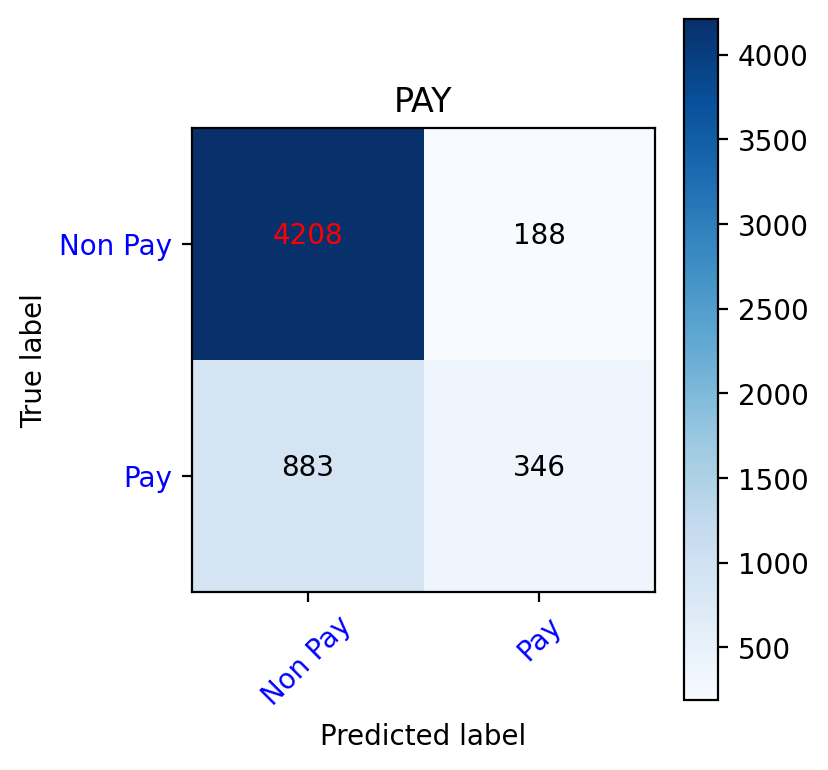

In [180]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    print(cm)
    plt.figure(figsize=(4,4))
    plt.rcParams.update({'font.size': 10})
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, color="blue")
    plt.yticks(tick_marks, classes, color="blue")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cfm = confusion_matrix(y[ var_tgt ], y_pred=y_predict)
plot_confusion_matrix(cfm, classes=['Non Pay','Pay'],
                      title='PAY')
tn, fp, fn, tp = cfm.ravel()

In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
y_train = y[ var_tgt ]
y_pred = y_predict
roc=roc_auc_score(y_train, y_pred)
acc = accuracy_score(y_train, y_pred)
prec = precision_score(y_train, y_pred)
rec = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)

results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.81,0.65,0.28,0.39,0.62


In [181]:
target_names = ['0', '1']
print(classification_report(y[ var_tgt ], y_predict, target_names=target_names))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4396
           1       0.65      0.28      0.39      1229

    accuracy                           0.81      5625
   macro avg       0.74      0.62      0.64      5625
weighted avg       0.79      0.81      0.78      5625



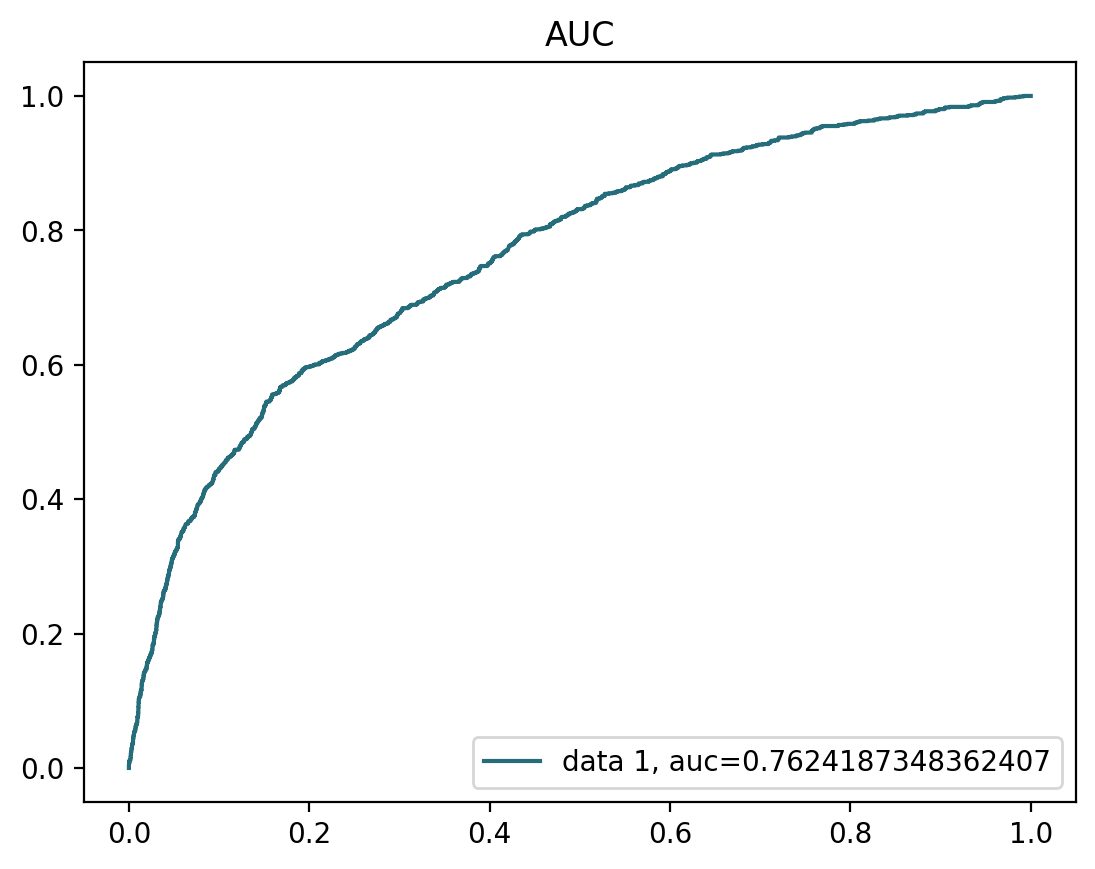

In [182]:
y_pred_proba = model.predict_proba(X[ varw ])[::,1]
fpr, tpr, _ = roc_curve(y[ var_tgt ],  y_pred_proba)
auc = roc_auc_score(y[ var_tgt ], y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc), color="#256D7B")
plt.legend(loc=4)
plt.title("AUC")
plt.show()

## Score

In [183]:
PDO = 40
base_score = 600
base_odds = 2

factor = PDO / np.log(2)

offset = base_score - factor * np.log( base_odds)

print(f"Factor: {factor}, Offset: {offset}")

betas = model.coef_[0].tolist()
beta0 = model.intercept_[0]

n = len(betas)

Factor: 57.70780163555854, Offset: 560.0


In [184]:
for v, beta in zip(varw, betas):

    print(f"Variable: {v}, con beta: {beta}")

    X[f'pts_{v}'] = np.ceil(  ( -X[v] * beta+beta0 / n  ) * factor + offset / n )
    X[f'pts_{v}'] = np.ceil(  ( -X[v] * beta+beta0 / n  ) * factor + offset / n )

Variable: w_PAY_0, con beta: -0.6555616076902491
Variable: w_d_Num_Meses_Con_Retraso_5, con beta: -0.02762000303718895
Variable: w_PAY_2, con beta: -0.07259257418323735
Variable: w_PAY_3, con beta: -0.24051104757529024
Variable: w_PAY_4, con beta: -0.14747619390996947
Variable: w_PAY_5, con beta: -0.25541268851258087
Variable: w_PAY_6, con beta: -0.15643564355412376
Variable: w_d_LIMIT_BAL_4, con beta: -0.15859582782976633
Variable: w_d_Utilizacion_Credito_Promedio_5, con beta: -0.5040755632449685
Variable: w_d_Suma_Pagos_Historicos_5, con beta: -0.07007232283555824
Variable: w_d_Max_Meses_Con_Retraso_5, con beta: 0.05862140086583809
Variable: w_d_PAY_AMT2_5, con beta: -0.021072205316823217
Variable: w_d_Promedio_Pago_Ultimos_Meses_3, con beta: -0.16699097455927242
Variable: w_d_Edad_x_Limite_Credito_5, con beta: -0.11001467714169222
Variable: w_d_PAY_AMT1_5, con beta: 0.1274317753958514
Variable: w_d_Ratio_Pago_Factura_Anterior_4, con beta: 0.04422483858033676
Variable: w_d_PAY_AMT3_4

Intercept: [-1.2601524]

Feature Coefficients:
                                    Feature  Coefficient
0                                  w_PAY_0        -0.66
1              w_d_Num_Meses_Con_Retraso_5        -0.03
2                                  w_PAY_2        -0.07
3                                  w_PAY_3        -0.24
4                                  w_PAY_4        -0.15
5                                  w_PAY_5        -0.26
6                                  w_PAY_6        -0.16
7                          w_d_LIMIT_BAL_4        -0.16
8       w_d_Utilizacion_Credito_Promedio_5        -0.50
9              w_d_Suma_Pagos_Historicos_5        -0.07
10             w_d_Max_Meses_Con_Retraso_5         0.06
11                          w_d_PAY_AMT2_5        -0.02
12       w_d_Promedio_Pago_Ultimos_Meses_3        -0.17
13             w_d_Edad_x_Limite_Credito_5        -0.11
14                          w_d_PAY_AMT1_5         0.13
15       w_d_Ratio_Pago_Factura_Anterior_4         0.04


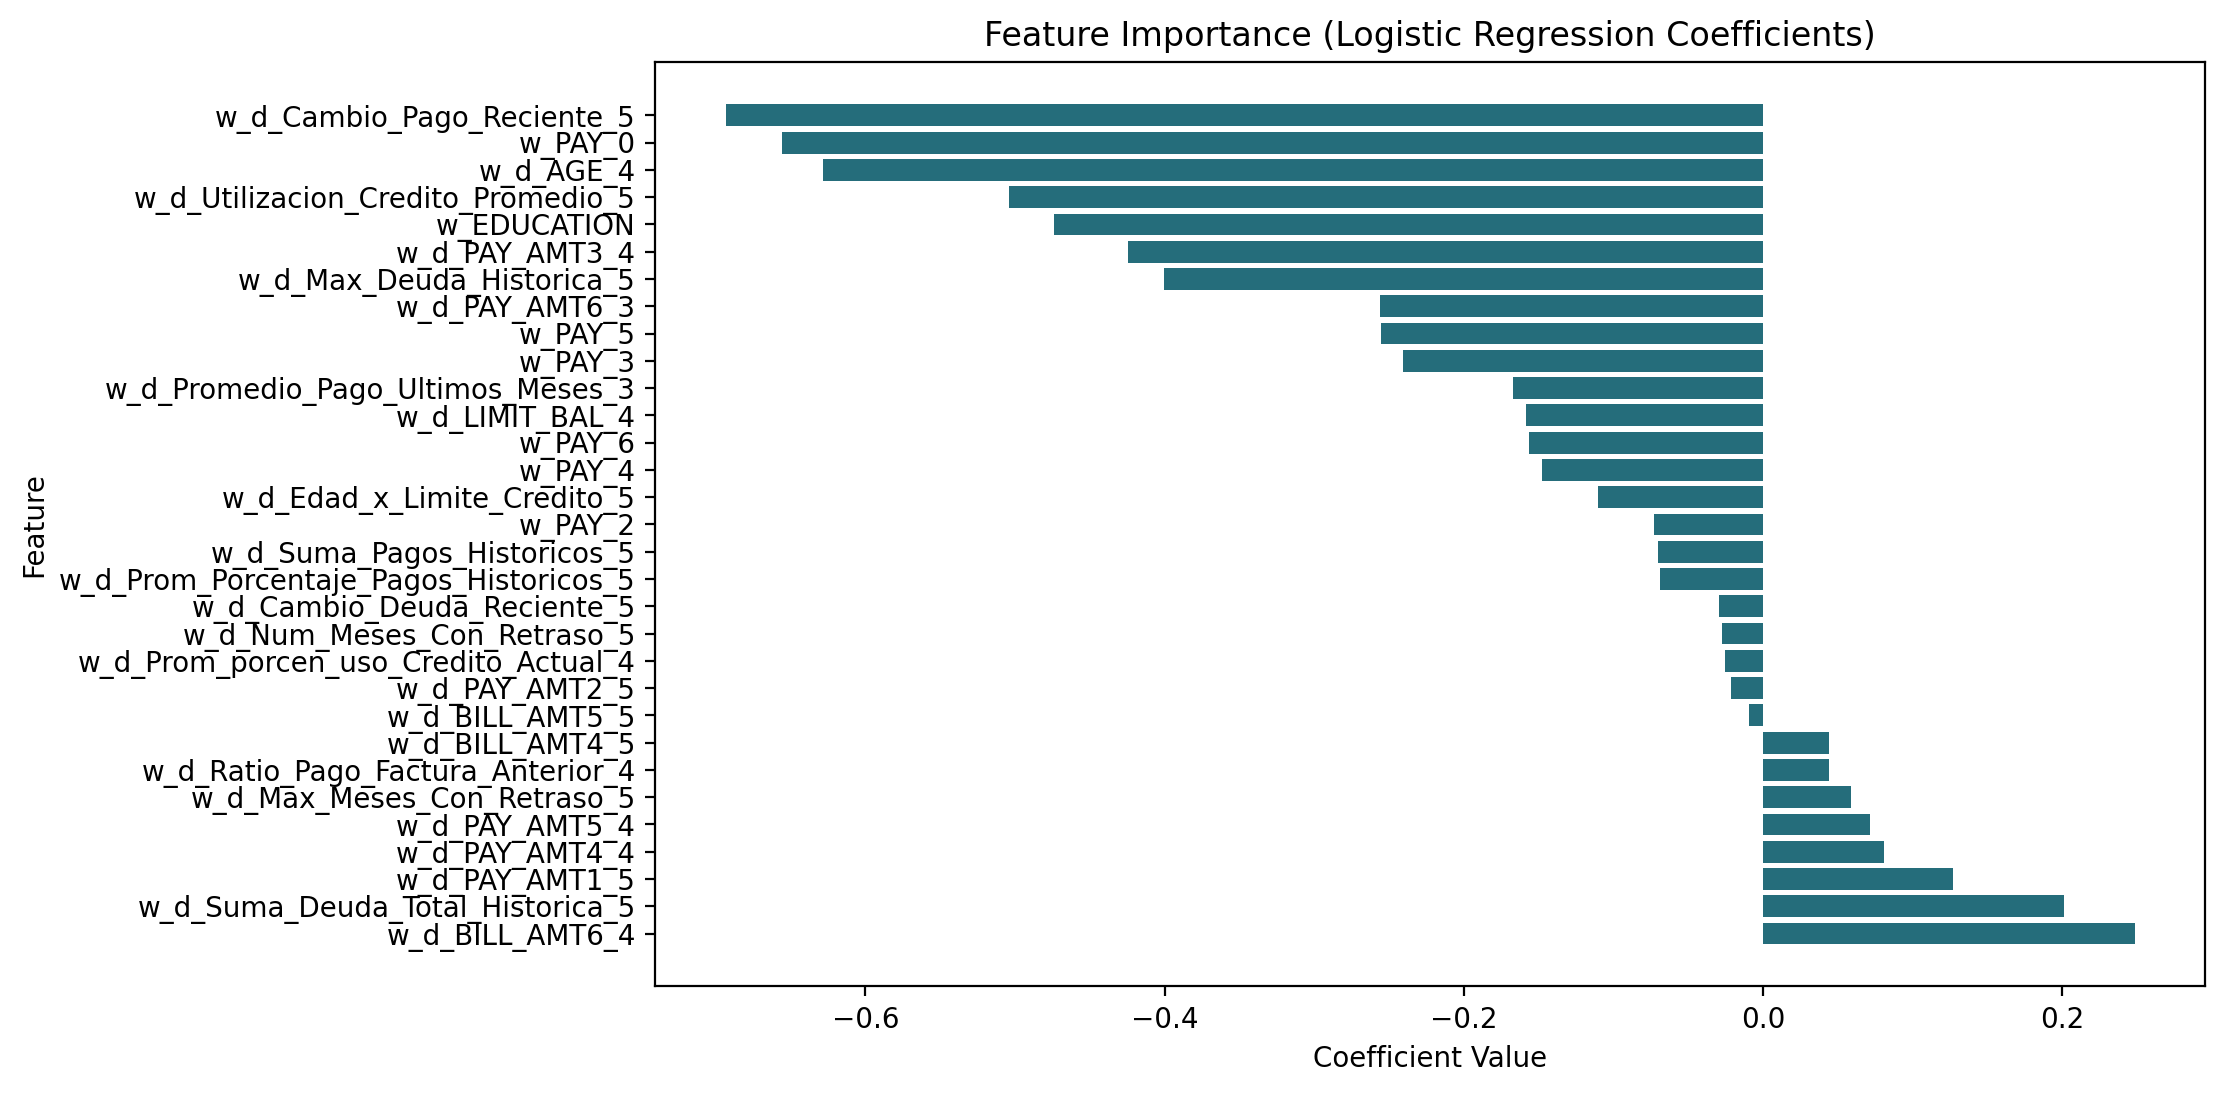

In [185]:
# Extraer información del modelo
print("Intercept:", model.intercept_)
coeff_df = pd.DataFrame({"Feature": X[ varw ].columns, "Coefficient": model.coef_[0]})
print("\nFeature Coefficients:\n", coeff_df)

# Resumir los resultados del modelo 
# Sort dataframe by coefficients.
coef_df_sorted = coeff_df.sort_values(by="Coefficient", ascending=False)

# Create plot.
plt.figure(figsize=(10,6))
#plt.barh(coeff_df["Feature"], coef_df_sorted["Coefficient"], color="blue")
plt.barh(data=coef_df_sorted, y="Feature", width="Coefficient", color="#256D7B")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.show()

In [275]:
pd.to_pickle(model, "/Users/gblasd/Documents/DataScience/02_SupervisedLearning/notebooks/Exams/BlasDuranGustavo_CreditScoring.pickle")

In [186]:
varp = X.filter( like='pts' ).columns.tolist()
varp

['pts_w_PAY_0',
 'pts_w_d_Num_Meses_Con_Retraso_5',
 'pts_w_PAY_2',
 'pts_w_PAY_3',
 'pts_w_PAY_4',
 'pts_w_PAY_5',
 'pts_w_PAY_6',
 'pts_w_d_LIMIT_BAL_4',
 'pts_w_d_Utilizacion_Credito_Promedio_5',
 'pts_w_d_Suma_Pagos_Historicos_5',
 'pts_w_d_Max_Meses_Con_Retraso_5',
 'pts_w_d_PAY_AMT2_5',
 'pts_w_d_Promedio_Pago_Ultimos_Meses_3',
 'pts_w_d_Edad_x_Limite_Credito_5',
 'pts_w_d_PAY_AMT1_5',
 'pts_w_d_Ratio_Pago_Factura_Anterior_4',
 'pts_w_d_PAY_AMT3_4',
 'pts_w_d_PAY_AMT4_4',
 'pts_w_d_PAY_AMT6_3',
 'pts_w_d_PAY_AMT5_4',
 'pts_w_d_Cambio_Deuda_Reciente_5',
 'pts_w_d_Prom_porcen_uso_Credito_Actual_4',
 'pts_w_d_Prom_Porcentaje_Pagos_Historicos_5',
 'pts_w_EDUCATION',
 'pts_w_d_Cambio_Pago_Reciente_5',
 'pts_w_d_Suma_Deuda_Total_Historica_5',
 'pts_w_d_Max_Deuda_Historica_5',
 'pts_w_d_BILL_AMT5_5',
 'pts_w_d_AGE_4',
 'pts_w_d_BILL_AMT6_4',
 'pts_w_d_BILL_AMT4_5']

In [187]:
X['score'] = X[varp].sum(axis=1)

In [188]:
X

,CUSTOMER_ID,w_PAY_0,w_d_Num_Meses_Con_Retraso_5,w_PAY_2,w_PAY_3,w_PAY_4,w_PAY_5,w_PAY_6,w_d_LIMIT_BAL_4,w_d_Utilizacion_Credito_Promedio_5,w_d_Suma_Pagos_Historicos_5,w_d_Max_Meses_Con_Retraso_5,w_d_PAY_AMT2_5,w_d_Promedio_Pago_Ultimos_Meses_3,w_d_Edad_x_Limite_Credito_5,w_d_PAY_AMT1_5,w_d_Ratio_Pago_Factura_Anterior_4,w_d_PAY_AMT3_4,w_d_PAY_AMT4_4,w_d_PAY_AMT6_3,w_d_PAY_AMT5_4,w_d_Cambio_Deuda_Reciente_5,w_d_Prom_porcen_uso_Credito_Actual_4,w_d_Prom_Porcentaje_Pagos_Historicos_5,w_EDUCATION,w_d_Cambio_Pago_Reciente_5,w_d_Suma_Deuda_Total_Historica_5,w_d_Max_Deuda_Historica_5,w_d_BILL_AMT5_5,w_d_AGE_4,w_d_BILL_AMT6_4,w_d_BILL_AMT4_5,pts_w_PAY_0,pts_w_d_Num_Meses_Con_Retraso_5,pts_w_PAY_2,pts_w_PAY_3,pts_w_PAY_4,pts_w_PAY_5,pts_w_PAY_6,pts_w_d_LIMIT_BAL_4,pts_w_d_Utilizacion_Credito_Promedio_5,pts_w_d_Suma_Pagos_Historicos_5,pts_w_d_Max_Meses_Con_Retraso_5,pts_w_d_PAY_AMT2_5,pts_w_d_Promedio_Pago_Ultimos_Meses_3,pts_w_d_Edad_x_Limite_Credito_5,pts_w_d_PAY_AMT1_5,pts_w_d_Ratio_Pago_Factura_Anterior_4,pts_w_d_PAY_AMT3_4,pts_w_d_PAY_AMT4_4,pts_w_d_PAY_AMT6_3,pts_w_d_PAY_AMT5_4,pts_w_d_Cambio_Deuda_Reciente_5,pts_w_d_Prom_porcen_uso_Credito_Actual_4,pts_w_d_Prom_Porcentaje_Pagos_Historicos_5,pts_w_EDUCATION,pts_w_d_Cambio_Pago_Reciente_5,pts_w_d_Suma_Deuda_Total_Historica_5,pts_w_d_Max_Deuda_Historica_5,pts_w_d_BILL_AMT5_5,pts_w_d_AGE_4,pts_w_d_BILL_AMT6_4,pts_w_d_BILL_AMT4_5,score
0,26369,0.55,0.36,0.36,0.33,0.28,0.25,0.21,-0.42,-0.57,-0.29,0.08,-0.07,-0.31,-0.38,-0.09,-0.05,0.07,-0.04,-0.08,-0.02,-0.17,-0.24,-0.11,-0.11,0.25,-0.10,0.07,-0.07,0.20,0.15,-0.14,37.00,17.00,18.00,21.00,19.00,20.00,18.00,12.00,-0.00,15.00,16.00,16.00,13.00,14.00,17.00,16.00,18.00,16.00,15.00,16.00,16.00,16.00,16.00,13.00,26.00,17.00,18.00,16.00,23.00,14.00,17.00,526.00
1,21561,0.55,0.36,0.36,0.33,0.28,0.25,0.21,-0.42,-0.57,-0.29,0.08,-0.07,-0.31,-0.38,-0.09,-0.05,0.07,-0.04,-0.26,-0.02,-0.21,-0.24,-0.19,0.15,-0.03,-0.10,-0.01,-0.07,-0.07,0.15,-0.08,37.00,17.00,18.00,21.00,19.00,20.00,18.00,12.00,-0.00,15.00,16.00,16.00,13.00,14.00,17.00,16.00,18.00,16.00,12.00,16.00,16.00,16.00,15.00,20.00,15.00,17.00,16.00,16.00,14.00,14.00,16.00,506.00
2,9066,0.55,0.36,0.36,0.33,0.28,0.25,0.21,0.62,0.38,0.55,0.08,0.64,0.58,0.56,0.57,-0.05,0.03,-0.04,0.44,0.41,0.47,-0.15,0.03,-0.10,0.22,0.03,0.20,0.21,0.20,-0.01,0.06,37.00,17.00,18.00,21.00,19.00,20.00,18.00,22.00,27.00,18.00,16.00,17.00,22.00,20.00,12.00,16.00,17.00,16.00,23.00,15.00,17.00,16.00,16.00,14.00,25.00,16.00,21.00,16.00,23.00,16.00,16.00,587.00
3,3318,-1.21,0.36,0.36,0.33,0.28,0.25,0.21,0.62,-0.04,-0.06,0.08,-0.55,-0.31,-0.03,-0.09,-0.41,0.03,-0.37,0.44,-0.33,-0.16,0.05,-0.08,0.15,-0.14,-0.15,-0.18,-0.08,-0.07,-0.01,0.20,-30.00,17.00,18.00,21.00,19.00,20.00,18.00,22.00,15.00,16.00,16.00,16.00,13.00,16.00,17.00,17.00,17.00,18.00,23.00,18.00,16.00,16.00,16.00,20.00,11.00,18.00,12.00,16.00,14.00,16.00,16.00,478.00
4,17360,0.55,0.36,0.36,0.33,0.28,0.25,0.21,0.62,0.49,0.55,0.08,-0.07,-0.14,0.38,-0.09,0.10,0.07,-0.04,0.44,0.02,-0.17,0.41,-0.19,0.15,0.25,0.00,0.07,-0.12,-0.07,-0.18,-0.14,37.00,17.00,18.00,21.00,19.00,20.00,18.00,22.00,31.00,18.00,16.00,16.00,15.00,19.00,17.00,16.00,18.00,16.00,23.00,16.00,16.00,17.00,15.00,20.00,26.00,16.00,18.00,16.00,14.00,19.00,17.00,587.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5620,20236,0.55,0.36,0.36,0.33,0.28,-1.49,0.21,-0.42,0.38,-0.42,0.08,-0.07,-0.31,-0.38,-0.09,-0.05,0.07,-0.37,-0.26,-0.02,-0.21,0.41,-0.19,-0.11,0.25,0.24,-0.01,0.21,-0.11,0.15,0.20,37.00,17.00,18.00,21.00,19.00,-6.00,18.00,12.00,27.00,15.00,16.00,16.00,13.00,14.00,17.00,16.00,18.00,18.00,12.00,16.00,16.00,17.00,15.00,13.00,26.00,13.00,16.00,16.00,12.00,14.00,16.00,508.00
5621,2723,0.55,0.36,0.36,0.33,0.28,0.25,0.21,-0.42,-0.57,-0.29,0.08,-0.07,-0.31,-0.38,-0.09,-0.05,0.07,-0.04,-0.26

In [189]:
lst = []

for vi, vp in zip( [x for x in varw], varp):
    print(vi , " ----- " , vp)
    X_aux = X.merge(train_default[var_um+[x[2:] for x in varw]], on=var_um, how='left', )
    #print(vi, vi[2:], vp)
    aux = X_aux[[vi,vi[2:],vp]].drop_duplicates()
    aux = aux.sort_values( by = vi , ascending = True ).reset_index(drop=True)
    aux.columns = ['valor','atributo','puntos']
    aux['característica'] = vi
    lst.append(aux)

w_PAY_0  -----  pts_w_PAY_0
w_d_Num_Meses_Con_Retraso_5  -----  pts_w_d_Num_Meses_Con_Retraso_5
w_PAY_2  -----  pts_w_PAY_2
w_PAY_3  -----  pts_w_PAY_3
w_PAY_4  -----  pts_w_PAY_4
w_PAY_5  -----  pts_w_PAY_5
w_PAY_6  -----  pts_w_PAY_6
w_d_LIMIT_BAL_4  -----  pts_w_d_LIMIT_BAL_4
w_d_Utilizacion_Credito_Promedio_5  -----  pts_w_d_Utilizacion_Credito_Promedio_5
w_d_Suma_Pagos_Historicos_5  -----  pts_w_d_Suma_Pagos_Historicos_5
w_d_Max_Meses_Con_Retraso_5  -----  pts_w_d_Max_Meses_Con_Retraso_5
w_d_PAY_AMT2_5  -----  pts_w_d_PAY_AMT2_5
w_d_Promedio_Pago_Ultimos_Meses_3  -----  pts_w_d_Promedio_Pago_Ultimos_Meses_3


w_d_Edad_x_Limite_Credito_5  -----  pts_w_d_Edad_x_Limite_Credito_5
w_d_PAY_AMT1_5  -----  pts_w_d_PAY_AMT1_5
w_d_Ratio_Pago_Factura_Anterior_4  -----  pts_w_d_Ratio_Pago_Factura_Anterior_4
w_d_PAY_AMT3_4  -----  pts_w_d_PAY_AMT3_4
w_d_PAY_AMT4_4  -----  pts_w_d_PAY_AMT4_4
w_d_PAY_AMT6_3  -----  pts_w_d_PAY_AMT6_3
w_d_PAY_AMT5_4  -----  pts_w_d_PAY_AMT5_4
w_d_Cambio_Deuda_Reciente_5  -----  pts_w_d_Cambio_Deuda_Reciente_5
w_d_Prom_porcen_uso_Credito_Actual_4  -----  pts_w_d_Prom_porcen_uso_Credito_Actual_4
w_d_Prom_Porcentaje_Pagos_Historicos_5  -----  pts_w_d_Prom_Porcentaje_Pagos_Historicos_5
w_EDUCATION  -----  pts_w_EDUCATION
w_d_Cambio_Pago_Reciente_5  -----  pts_w_d_Cambio_Pago_Reciente_5
w_d_Suma_Deuda_Total_Historica_5  -----  pts_w_d_Suma_Deuda_Total_Historica_5
w_d_Max_Deuda_Historica_5  -----  pts_w_d_Max_Deuda_Historica_5
w_d_BILL_AMT5_5  -----  pts_w_d_BILL_AMT5_5
w_d_AGE_4  -----  pts_w_d_AGE_4
w_d_BILL_AMT6_4  -----  pts_w_d_BILL_AMT6_4
w_d_BILL_AMT4_5  -----  pts_w_d_BI

In [190]:
scorecard = pd.concat(lst,ignore_index=True)
scorecard.head()

,valor,atributo,puntos,característica
0,-1.21,1,-30.00,w_PAY_0
1,0.55,0,37.00,w_PAY_0
2,-1.44,"(1.0, 5.0]",14.00,w_d_Num_Meses_Con_Retraso_5
3,0.36,"(-0.001, 1.0]",17.00,w_d_Num_Meses_Con_Retraso_5
4,-1.41,1,10.00,w_PAY_2


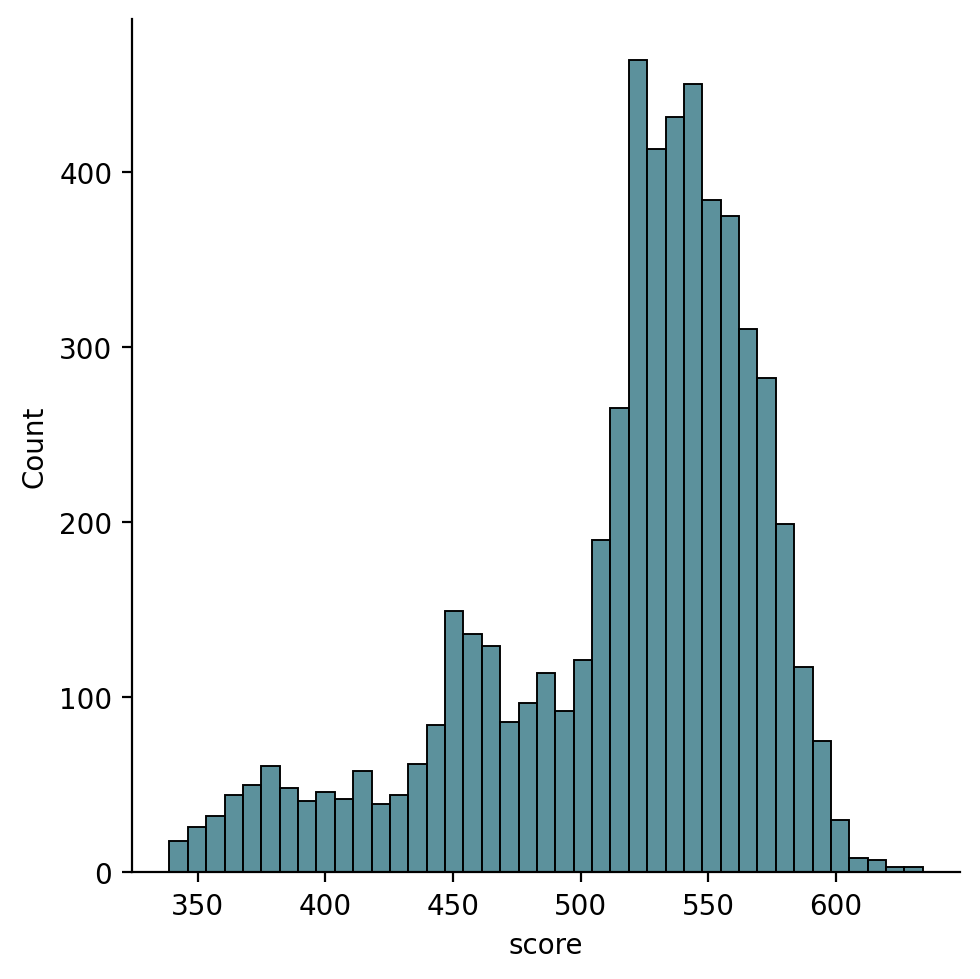

In [191]:
sns.displot(X['score'], color="#256D7B")

In [192]:
pd.set_option("display.max_rows",200)
scorecard[['característica', 'valor','atributo','puntos']].sort_values(['característica','atributo']).reset_index(drop=True)

,característica,valor,atributo,puntos
0,w_EDUCATION,1.41,0,55.00
1,w_EDUCATION,0.15,1,20.00
2,w_EDUCATION,-0.11,2,13.00
3,w_EDUCATION,-0.10,3,14.00
4,w_PAY_0,0.55,0,37.00
5,w_PAY_0,-1.21,1,-30.00
6,w_PAY_2,0.36,0,18.00
7,w_PAY_2,-1.41,1,10.00
8,w_PAY_3,0.33,0,21.00
9,w_PAY_3,-1.41,1,-3.00


In [193]:
X

,CUSTOMER_ID,w_PAY_0,w_d_Num_Meses_Con_Retraso_5,w_PAY_2,w_PAY_3,w_PAY_4,w_PAY_5,w_PAY_6,w_d_LIMIT_BAL_4,w_d_Utilizacion_Credito_Promedio_5,w_d_Suma_Pagos_Historicos_5,w_d_Max_Meses_Con_Retraso_5,w_d_PAY_AMT2_5,w_d_Promedio_Pago_Ultimos_Meses_3,w_d_Edad_x_Limite_Credito_5,w_d_PAY_AMT1_5,w_d_Ratio_Pago_Factura_Anterior_4,w_d_PAY_AMT3_4,w_d_PAY_AMT4_4,w_d_PAY_AMT6_3,w_d_PAY_AMT5_4,w_d_Cambio_Deuda_Reciente_5,w_d_Prom_porcen_uso_Credito_Actual_4,w_d_Prom_Porcentaje_Pagos_Historicos_5,w_EDUCATION,w_d_Cambio_Pago_Reciente_5,w_d_Suma_Deuda_Total_Historica_5,w_d_Max_Deuda_Historica_5,w_d_BILL_AMT5_5,w_d_AGE_4,w_d_BILL_AMT6_4,w_d_BILL_AMT4_5,pts_w_PAY_0,pts_w_d_Num_Meses_Con_Retraso_5,pts_w_PAY_2,pts_w_PAY_3,pts_w_PAY_4,pts_w_PAY_5,pts_w_PAY_6,pts_w_d_LIMIT_BAL_4,pts_w_d_Utilizacion_Credito_Promedio_5,pts_w_d_Suma_Pagos_Historicos_5,pts_w_d_Max_Meses_Con_Retraso_5,pts_w_d_PAY_AMT2_5,pts_w_d_Promedio_Pago_Ultimos_Meses_3,pts_w_d_Edad_x_Limite_Credito_5,pts_w_d_PAY_AMT1_5,pts_w_d_Ratio_Pago_Factura_Anterior_4,pts_w_d_PAY_AMT3_4,pts_w_d_PAY_AMT4_4,pts_w_d_PAY_AMT6_3,pts_w_d_PAY_AMT5_4,pts_w_d_Cambio_Deuda_Reciente_5,pts_w_d_Prom_porcen_uso_Credito_Actual_4,pts_w_d_Prom_Porcentaje_Pagos_Historicos_5,pts_w_EDUCATION,pts_w_d_Cambio_Pago_Reciente_5,pts_w_d_Suma_Deuda_Total_Historica_5,pts_w_d_Max_Deuda_Historica_5,pts_w_d_BILL_AMT5_5,pts_w_d_AGE_4,pts_w_d_BILL_AMT6_4,pts_w_d_BILL_AMT4_5,score
0,26369,0.55,0.36,0.36,0.33,0.28,0.25,0.21,-0.42,-0.57,-0.29,0.08,-0.07,-0.31,-0.38,-0.09,-0.05,0.07,-0.04,-0.08,-0.02,-0.17,-0.24,-0.11,-0.11,0.25,-0.10,0.07,-0.07,0.20,0.15,-0.14,37.00,17.00,18.00,21.00,19.00,20.00,18.00,12.00,-0.00,15.00,16.00,16.00,13.00,14.00,17.00,16.00,18.00,16.00,15.00,16.00,16.00,16.00,16.00,13.00,26.00,17.00,18.00,16.00,23.00,14.00,17.00,526.00
1,21561,0.55,0.36,0.36,0.33,0.28,0.25,0.21,-0.42,-0.57,-0.29,0.08,-0.07,-0.31,-0.38,-0.09,-0.05,0.07,-0.04,-0.26,-0.02,-0.21,-0.24,-0.19,0.15,-0.03,-0.10,-0.01,-0.07,-0.07,0.15,-0.08,37.00,17.00,18.00,21.00,19.00,20.00,18.00,12.00,-0.00,15.00,16.00,16.00,13.00,14.00,17.00,16.00,18.00,16.00,12.00,16.00,16.00,16.00,15.00,20.00,15.00,17.00,16.00,16.00,14.00,14.00,16.00,506.00
2,9066,0.55,0.36,0.36,0.33,0.28,0.25,0.21,0.62,0.38,0.55,0.08,0.64,0.58,0.56,0.57,-0.05,0.03,-0.04,0.44,0.41,0.47,-0.15,0.03,-0.10,0.22,0.03,0.20,0.21,0.20,-0.01,0.06,37.00,17.00,18.00,21.00,19.00,20.00,18.00,22.00,27.00,18.00,16.00,17.00,22.00,20.00,12.00,16.00,17.00,16.00,23.00,15.00,17.00,16.00,16.00,14.00,25.00,16.00,21.00,16.00,23.00,16.00,16.00,587.00
3,3318,-1.21,0.36,0.36,0.33,0.28,0.25,0.21,0.62,-0.04,-0.06,0.08,-0.55,-0.31,-0.03,-0.09,-0.41,0.03,-0.37,0.44,-0.33,-0.16,0.05,-0.08,0.15,-0.14,-0.15,-0.18,-0.08,-0.07,-0.01,0.20,-30.00,17.00,18.00,21.00,19.00,20.00,18.00,22.00,15.00,16.00,16.00,16.00,13.00,16.00,17.00,17.00,17.00,18.00,23.00,18.00,16.00,16.00,16.00,20.00,11.00,18.00,12.00,16.00,14.00,16.00,16.00,478.00
4,17360,0.55,0.36,0.36,0.33,0.28,0.25,0.21,0.62,0.49,0.55,0.08,-0.07,-0.14,0.38,-0.09,0.10,0.07,-0.04,0.44,0.02,-0.17,0.41,-0.19,0.15,0.25,0.00,0.07,-0.12,-0.07,-0.18,-0.14,37.00,17.00,18.00,21.00,19.00,20.00,18.00,22.00,31.00,18.00,16.00,16.00,15.00,19.00,17.00,16.00,18.00,16.00,23.00,16.00,16.00,17.00,15.00,20.00,26.00,16.00,18.00,16.00,14.00,19.00,17.00,587.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5620,20236,0.55,0.36,0.36,0.33,0.28,-1.49,0.21,-0.42,0.38,-0.42,0.08,-0.07,-0.31,-0.38,-0.09,-0.05,0.07,-0.37,-0.26,-0.02,-0.21,0.41,-0.19,-0.11,0.25,0.24,-0.01,0.21,-0.11,0.15,0.20,37.00,17.00,18.00,21.00,19.00,-6.00,18.00,12.00,27.00,15.00,16.00,16.00,13.00,14.00,17.00,16.00,18.00,18.00,12.00,16.00,16.00,17.00,15.00,13.00,26.00,13.00,16.00,16.00,12.00,14.00,16.00,508.00
5621,2723,0.55,0.36,0.36,0.33,0.28,0.25,0.21,-0.42,-0.57,-0.29,0.08,-0.07,-0.31,-0.38,-0.09,-0.05,0.07,-0.04,-0.26

In [194]:
df_aux = X.merge(y, on=var_um, how='left')
df_aux['r_score'] = pd.cut(df_aux['score'],bins=11,include_lowest=True, ordered=True).astype(str)
aux     = df_aux[['r_score','default.payment.next.month']].copy()
aux['n']= 1
aux = aux.pivot_table(index='r_score',columns='default.payment.next.month',values='n',aggfunc='sum')
aux.to_excel('/Users/gblasd/Documents/DataScience/02_SupervisedLearning/notebooks/Exams/SCORE.xlsx')
aux = aux.reset_index()
aux

default.payment.next.month,r_score,0,1
0,"(338.704, 365.818]",33.00,74.00
1,"(365.818, 392.636]",62.00,127.00
2,"(392.636, 419.455]",69.00,107.00
3,"(419.455, 446.273]",100.00,123.00
4,"(446.273, 473.091]",306.00,171.00
5,"(473.091, 499.909]",246.00,110.00
6,"(499.909, 526.727]",822.00,188.00
7,"(526.727, 553.545]","1,378.00",237.00
8,"(553.545, 580.364]","1,090.00",72.00
9,"(580.364, 607.182]",271.00,20.00


In [195]:
aux["TB"] = aux[0]/(aux[0]+aux[1])*100
aux["TM"] = aux[1]/(aux[0]+aux[1])*100
aux["odds"] = np.where(aux[0]!=0, aux[1]/aux[0], np.nan)
aux["AcumB"] = aux[0].cumsum()
aux["AcumM"] = aux[1].cumsum()
aux["%AB"] = (aux["AcumB"]/aux[0].sum())*100
aux["%AM"] = (aux["AcumM"]/aux[1].sum())*100
aux

default.payment.next.month,r_score,0,1,TB,TM,odds,AcumB,AcumM,%AB,%AM
0,"(338.704, 365.818]",33.00,74.00,30.84,69.16,2.24,33.00,74.00,0.75,6.02
1,"(365.818, 392.636]",62.00,127.00,32.80,67.20,2.05,95.00,201.00,2.16,16.35
2,"(392.636, 419.455]",69.00,107.00,39.20,60.80,1.55,164.00,308.00,3.73,25.06
3,"(419.455, 446.273]",100.00,123.00,44.84,55.16,1.23,264.00,431.00,6.01,35.07
4,"(446.273, 473.091]",306.00,171.00,64.15,35.85,0.56,570.00,602.00,12.97,48.98
5,"(473.091, 499.909]",246.00,110.00,69.10,30.90,0.45,816.00,712.00,18.56,57.93
6,"(499.909, 526.727]",822.00,188.00,81.39,18.61,0.23,"1,638.00",900.00,37.26,73.23
7,"(526.727, 553.545]","1,378.00",237.00,85.33,14.67,0.17,"3,016.00","1,137.00",68.61,92.51
8,"(553.545, 580.364]","1,090.00",72.00,93.80,6.20,0.07,"4,106.00","1,209.00",93.40,98.37
9,"(580.364, 607.182]",271.00,20.00,93.13,6.87,0.07,"4,377.00","1,229.00",99.57,100.00


In [196]:
aux.to_excel('/Users/gblasd/Documents/DataScience/02_SupervisedLearning/notebooks/Exams/SCORE.xlsx')

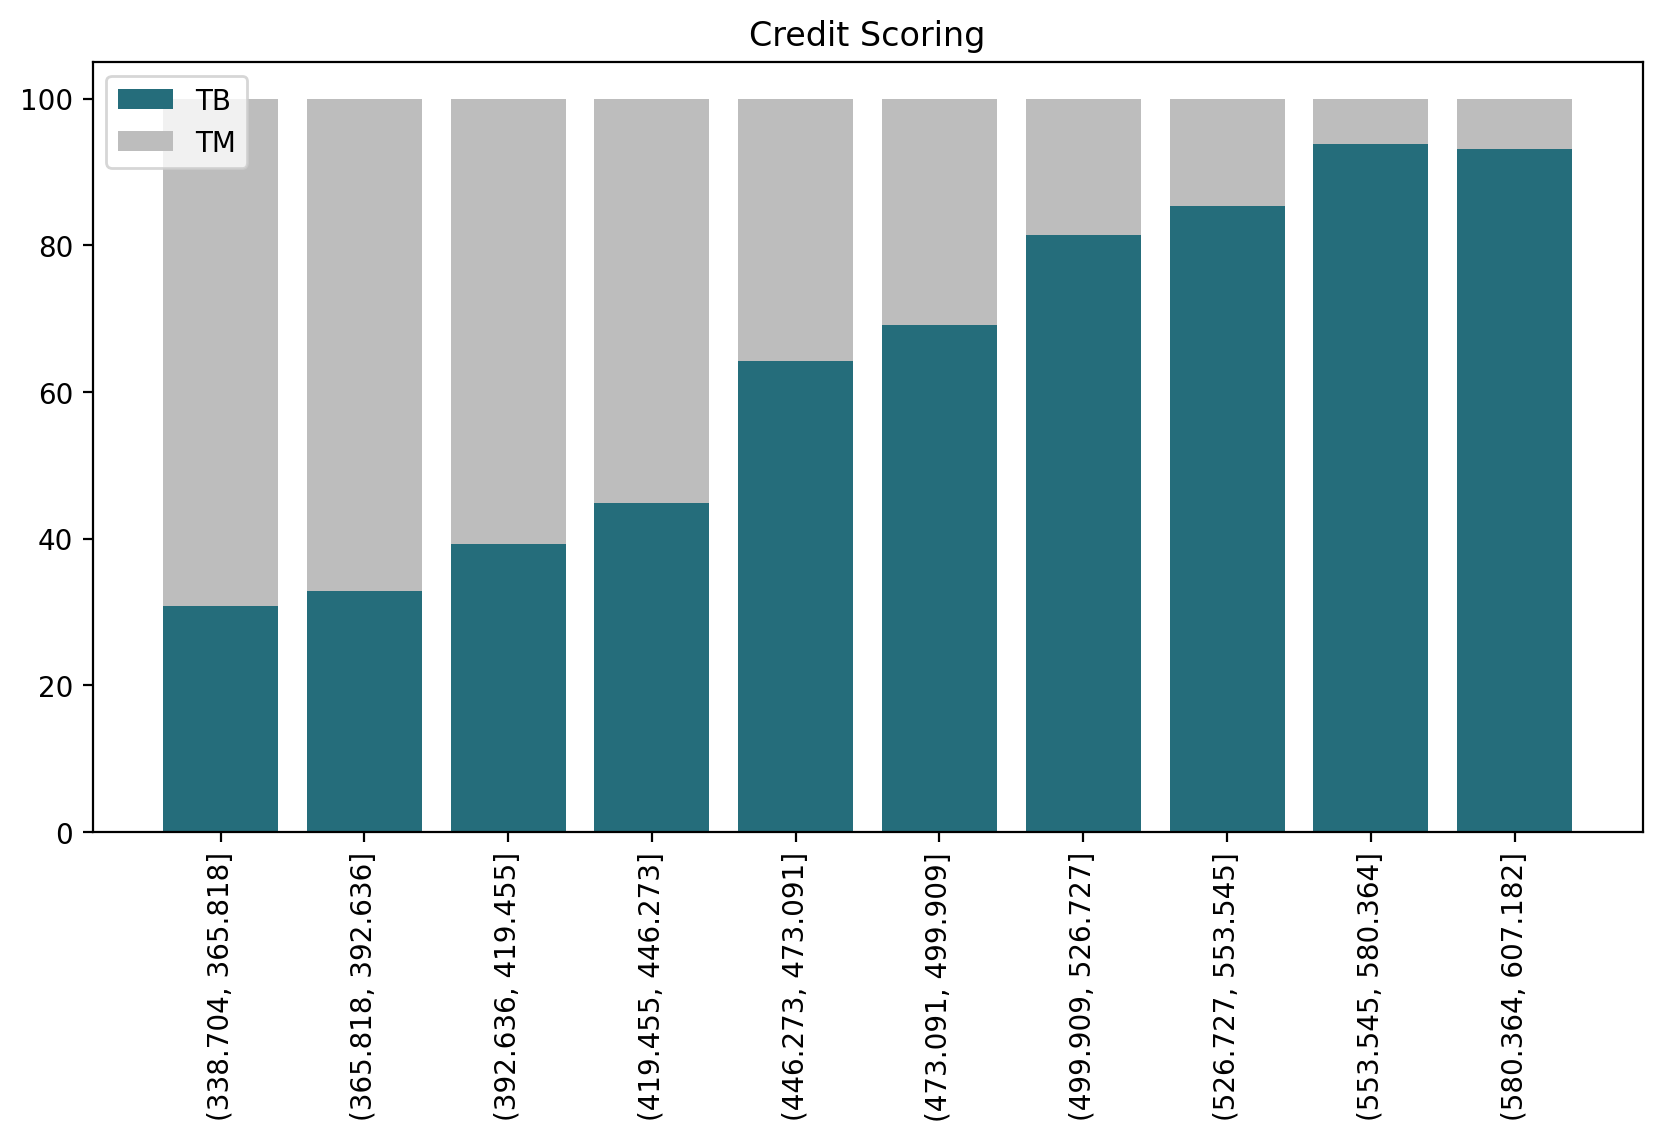

In [197]:
plt.figure(figsize=(10,5))
plt.bar(x="r_score", height="TB", data=aux, color="#256D7B")#verde
plt.bar(x="r_score", height="TM", data=aux, bottom="TB", color="#bdbdbd") #gris
plt.xticks(rotation=90)
plt.title("Credit Scoring")
plt.legend(["TB", "TM"])
plt.show()

In [198]:
aux

default.payment.next.month,r_score,0,1,TB,TM,odds,AcumB,AcumM,%AB,%AM
0,"(338.704, 365.818]",33.00,74.00,30.84,69.16,2.24,33.00,74.00,0.75,6.02
1,"(365.818, 392.636]",62.00,127.00,32.80,67.20,2.05,95.00,201.00,2.16,16.35
2,"(392.636, 419.455]",69.00,107.00,39.20,60.80,1.55,164.00,308.00,3.73,25.06
3,"(419.455, 446.273]",100.00,123.00,44.84,55.16,1.23,264.00,431.00,6.01,35.07
4,"(446.273, 473.091]",306.00,171.00,64.15,35.85,0.56,570.00,602.00,12.97,48.98
5,"(473.091, 499.909]",246.00,110.00,69.10,30.90,0.45,816.00,712.00,18.56,57.93
6,"(499.909, 526.727]",822.00,188.00,81.39,18.61,0.23,"1,638.00",900.00,37.26,73.23
7,"(526.727, 553.545]","1,378.00",237.00,85.33,14.67,0.17,"3,016.00","1,137.00",68.61,92.51
8,"(553.545, 580.364]","1,090.00",72.00,93.80,6.20,0.07,"4,106.00","1,209.00",93.40,98.37
9,"(580.364, 607.182]",271.00,20.00,93.13,6.87,0.07,"4,377.00","1,229.00",99.57,100.00


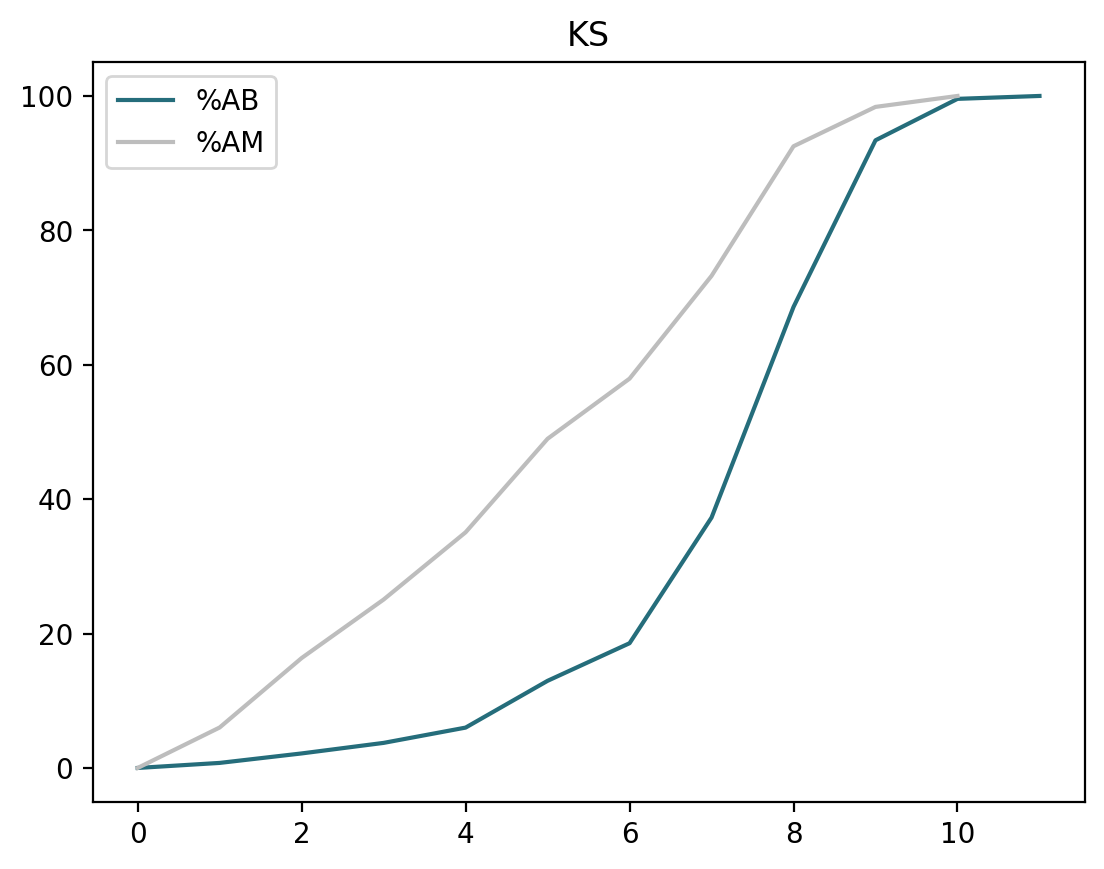

In [199]:
aux_graph = pd.concat([pd.DataFrame({"%AB":[0], "%AM":[0]}), aux], axis=0).reset_index(drop=True)
plt.plot(aux_graph["%AB"], color="#256D7B") # verde
plt.plot(aux_graph["%AM"], color="#bdbdbd") # gris
plt.legend(["%AB", "%AM"])
plt.title("KS")
plt.show()

In [200]:
def procesar_dataframe(df):
    # (1=preparatoria, 2=universidad, 3=secundaria, 4=otros, 5=desconocido, 6=desconocido, 0=nulo)
    #display(train_default['EDUCATION'].value_counts().sort_index())
    df['EDUCATION'].replace({4:0,5:0,6:0}, inplace=True) # clasificacion de valores desconocido
    df['EDUCATION'].replace({3:2, 2:3}, inplace=True) # cambiamos el orden de los valores, para darle mas peso
    #display(train_default['EDUCATION'].value_counts().sort_index())

    # * MARRIAGE: Estatus marital (1=casado, 2=soltero, 3=otros, 0=nulo)
    #display(train_default['MARRIAGE'].value_counts().sort_index())
    df['MARRIAGE'].replace({0:2, 3:2}, inplace=True)
    #display(train_default['MARRIAGE'].value_counts().sort_index())
    df['SEX'] = df['SEX'].astype(str)
    df['EDUCATION'] = df['EDUCATION'].astype(str)
    df['MARRIAGE'] = df['MARRIAGE'].astype(str)
    df[ 'Num_Meses_Con_Retraso' ] = df[['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2']].apply(lambda row: (row > 0).sum(), axis=1)
    df[ 'Max_Meses_Con_Retraso' ] = df[['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2']].apply(lambda row: max(list(filter(lambda x: x > 0, row)), default=0), axis=1)
    df[ 'Max_Retraso_Reciente' ] = df[['PAY_3', 'PAY_2']].apply(lambda row: max(list(filter(lambda x: x > 0,row)), default=0), axis=1)

    lst_var_1 = ['Num_Meses_Con_Retraso', 'Max_Meses_Con_Retraso', 'Max_Retraso_Reciente']

    df[ 'Promedio_Deuda_Ultimos_3_Meses' ] = df[['BILL_AMT2','BILL_AMT3','BILL_AMT4']].apply(lambda row: row.mean(), axis=1)
    df[ 'Cambio_Deuda_Reciente' ] = df[['BILL_AMT2','BILL_AMT3','BILL_AMT4']].apply(lambda row: row['BILL_AMT2'] - row['BILL_AMT3'], axis=1)
    df[ 'Suma_Deuda_Total_Historica' ] = df[['BILL_AMT2','BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].apply(lambda row: row.sum(), axis=1)
    df[ 'Max_Deuda_Historica' ] = df[['BILL_AMT2','BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].apply(lambda row: row.max(), axis=1)
    df[ 'Utilizacion_Credito_Actual' ] = df.apply(lambda row: (row['BILL_AMT1'] / row['LIMIT_BAL'])*100*row['LIMIT_BAL'], axis=1)
    df[ 'Prom_porcen_uso_Credito_Actual' ] = df.apply(lambda row: (row['BILL_AMT1'] / row['LIMIT_BAL'])*100, axis=1)
    df[ 'Utilizacion_Credito_Promedio' ] = df.apply(lambda row: (row[['BILL_AMT2','BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum()/ row['LIMIT_BAL']*5)*100 , axis=1)

    lst_var_2 = ['Promedio_Deuda_Ultimos_3_Meses', 'Cambio_Deuda_Reciente', 'Suma_Deuda_Total_Historica', 'Max_Deuda_Historica',
                    'Utilizacion_Credito_Actual', 'Prom_porcen_uso_Credito_Actual', 'Utilizacion_Credito_Promedio']

    df['Promedio_Pago_Ultimos_Meses'] = df[['PAY_AMT4','PAY_AMT3','PAY_AMT2']].apply(lambda row: row.sum()/3, axis=1)
    df['Suma_Pagos_Historicos'] = df[['PAY_AMT6','PAY_AMT5','PAY_AMT4','PAY_AMT3','PAY_AMT2']].apply(lambda row: row.sum(), axis=1)
    df['Prom_Porcentaje_Pagos_Historicos'] = df.apply(lambda row: get_mean_pay(row=row), axis=1)
    df['Cambio_Pago_Reciente'] = df.apply(lambda row: row['PAY_AMT2'] - row['PAY_AMT3'], axis=1)

    df['Ratio_Pago_Factura_Anterior'] = np.where(df['BILL_AMT2'] > 0, (df['PAY_AMT2'] / df['BILL_AMT2'])*100, 0)

    lst_var_3 = ['Promedio_Pago_Ultimos_Meses', 'Suma_Pagos_Historicos', 'Prom_Porcentaje_Pagos_Historicos',
                'Cambio_Pago_Reciente', 'Ratio_Pago_Factura_Anterior']

    df[ 'Edad_x_Limite_Credito' ] = df.apply(lambda row: row['AGE'] * row['LIMIT_BAL'], axis=1)

    lst_var_4 = ['Edad_x_Limite_Credito']

    df['PAY_0'] = df['PAY_0'].map(lambda x: 1 if x > 0 else 0)
    df['PAY_2'] = df['PAY_2'].map(lambda x: 1 if x > 0 else 0)
    df['PAY_3'] = df['PAY_3'].map(lambda x: 1 if x > 0 else 0)
    df['PAY_4'] = df['PAY_4'].map(lambda x: 1 if x > 0 else 0)
    df['PAY_5'] = df['PAY_5'].map(lambda x: 1 if x > 0 else 0)
    df['PAY_6'] = df['PAY_6'].map(lambda x: 1 if x > 0 else 0)


    df['PAY_0'] = df['PAY_0'].astype(str)
    df['PAY_2'] = df['PAY_2'].astype(str)
    df['PAY_3'] = df['PAY_3'].astype(str)
    df['PAY_4'] = df['PAY_4'].astype(str)
    df['PAY_5'] = df['PAY_5'].astype(str)
    df['PAY_6'] = df['PAY_6'].astype(str)

    # Unidad muestral
    var_um = ['CUSTOMER_ID']

    # Variables categoricas
    var_cat = ['SEX', 'EDUCATION', 'MARRIAGE'
            ,'PAY_0', 'PAY_2',    'PAY_3',    'PAY_4',    'PAY_5',    'PAY_6']

    # Variables numericas
    var_num = ['LIMIT_BAL','AGE',
            'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
            'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
                # 'PAY_0'
                #          'PAY_2',    'PAY_3',    'PAY_4',    'PAY_5',    'PAY_6'
                ] + lst_var_1 + lst_var_2 + lst_var_3 + lst_var_4

    var_tgt = ['default.payment.next.month']

    #df['d_SEX'] = df['SEX']
    #df['d_EDUCATION'] = df['EDUCATION']
    #df['d_MARRIAGE'] = df['MARRIAGE']
    #df['d_PAY_0'] = df['PAY_0']
    #df['d_PAY_2'] = df['PAY_2']
    #df['d_PAY_3'] = df['PAY_3']
    #df['d_PAY_4'] = df['PAY_4']
    #df['d_PAY_5'] = df['PAY_5']
    #df['d_PAY_6'] = df['PAY_6']
    #var_cat = ['d_SEX','d_EDUCATION','d_MARRIAGE','d_PAY_0','d_PAY_2','d_PAY_3','d_PAY_4','d_PAY_5','d_PAY_6']

    #X = df.drop(columns=var_cat)[ var_um + var_num ].join(pd.get_dummies(df[var_cat], dtype='int'))
    X = df[ var_um + var_num + var_cat ]

    return X


df_test = pd.read_csv('/Users/gblasd/Documents/DataScience/02_SupervisedLearning/data/Examen_1/val_default.csv', delimiter='|')
# obtenemos solo las variables que estan en la raiz
df_test = procesar_dataframe( df_test )#[['CUSTOMER_ID'] + iv_save['raiz'].to_list()] 
print( df_test.shape )
df_test.head()

(1875, 40)


,CUSTOMER_ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Num_Meses_Con_Retraso,Max_Meses_Con_Retraso,Max_Retraso_Reciente,Promedio_Deuda_Ultimos_3_Meses,Cambio_Deuda_Reciente,Suma_Deuda_Total_Historica,Max_Deuda_Historica,Utilizacion_Credito_Actual,Prom_porcen_uso_Credito_Actual,Utilizacion_Credito_Promedio,Promedio_Pago_Ultimos_Meses,Suma_Pagos_Historicos,Prom_Porcentaje_Pagos_Historicos,Cambio_Pago_Reciente,Ratio_Pago_Factura_Anterior,Edad_x_Limite_Credito,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,16687,"110,000.00",34,"93,039.00","81,169.00","82,800.00","107,986.00","99,627.00","80,610.00","4,500.00","4,100.00","67,606.00","4,100.00","3,100.00","2,861.00",0,0,0,"90,651.67","-1,631.00","452,192.00","107,986.00","9,303,900.00",84.58,"2,055.42","25,268.67","81,767.00",21.53,"-63,506.00",5.05,"3,740,000.00",2,3,2,0,0,0,0,0,0
1,9926,"30,000.00",23,"33,171.00","32,678.00","32,218.00","31,963.00","30,942.00","29,945.00","1,524.00","1,537.00","1,755.00","1,207.00","1,076.00","1,188.00",0,0,0,"32,286.33",460.00,"157,746.00","32,678.00","3,317,100.00",110.57,"2,629.10","1,499.67","6,763.00",24.01,-218.00,4.70,"690,000.00",2,2,2,0,0,0,0,0,0
2,29451,"220,000.00",30,"105,348.00","106,432.00","102,996.00","100,198.00","100,357.00","95,471.00","4,268.00","3,251.00","2,900.00","5,000.00",0.00,"105,300.00",5,2,2,"103,208.67","3,436.00","505,454.00","106,432.00","10,534,800.00",47.89,"1,148.76","3,717.00","116,451.00",22.30,351.00,3.05,"6,600,000.00",1,3,2,1,1,1,1,1,1
3,14803,"50,000.00",26,"18,838.00",385.00,"11,500.00","2,756.00","7,000.00","12,025.00",0.00,"11,615.00","2,756.00","7,000.00","12,025.00","1,880.00",0,0,0,"4,880.33","-11,115.00","33,666.00","12,025.00","1,883,800.00",37.68,336.66,"7,123.67","35,276.00",2.32,"8,859.00","3,016.88","1,300,000.00",1,3,2,0,0,0,0,0,0
4,14536,"50,000.00",28,"2,350.00","2,400.00","2,400.00","2,400.00","2,400.00","2,400.00",50.00,0.00,0.00,0.00,0.00,0.00,5,7,2,"2,400.00",0.00,"12,000.00","2,400.00","235,000.00",4.70,120.00,0.00,0.00,0.00,0.00,0.00,"1,400,000.00",2,2,2,1,1,1,1,1,1


In [201]:
df_bins = iv[iv['variable'].isin( best )].merge(pd.DataFrame(mapa_woe).rename(columns={0:'variable'}),
              on='variable',
              how='left')
df_bins["varw"] = df_bins[ 'variable' ].map( lambda x: f'w_{x}' )
df_bins['raiz'] = df_bins[ 'variable' ].map(lambda x: x if not str(x).startswith('d_') else x[2:-2])
df_bins

,variable,iv,1,varw,raiz
0,PAY_0,0.64,"{'0': 0.5533347470886072, '1': -1.212936312958...",w_PAY_0,PAY_0
1,d_Num_Meses_Con_Retraso_5,0.50,"{'(-0.001, 1.0]': 0.36478911843869116, '(1.0, ...",w_d_Num_Meses_Con_Retraso_5,Num_Meses_Con_Retraso
2,PAY_2,0.49,"{'0': 0.36126101479399675, '1': -1.41025525390...",w_PAY_2,PAY_2
3,PAY_3,0.44,"{'0': 0.3267924942459169, '1': -1.408025598581...",w_PAY_3,PAY_3
4,PAY_4,0.38,"{'0': 0.2765590509134303, '1': -1.402950436409...",w_PAY_4,PAY_4
5,PAY_5,0.35,"{'0': 0.2454352481620787, '1': -1.48616535610945}",w_PAY_5,PAY_5
6,PAY_6,0.27,"{'0': 0.21022348078291386, '1': -1.33723254659...",w_PAY_6,PAY_6
7,d_LIMIT_BAL_4,0.15,"{'(140000.0, 230000.0]': 0.20879242114972316, ...",w_d_LIMIT_BAL_4,LIMIT_BAL
8,d_Utilizacion_Credito_Promedio_5,0.14,"{'(-754.766, 38.347]': -0.042186496123510935, ...",w_d_Utilizacion_Credito_Promedio_5,Utilizacion_Credito_Promedio
9,d_Suma_Pagos_Historicos_5,0.14,"{'(-0.001, 3800.0]': -0.41957242045961424, '(1...",w_d_Suma_Pagos_Historicos_5,Suma_Pagos_Historicos


In [251]:
def get_binned_value(row, df_bins):
    result = {}
    for column in [x for x in row.index]:
        column = str(column)
        if column not in ['CUSTOMER_ID']:
            value = row.loc[column]
            bin_info = df_bins[df_bins["raiz"] == column]
            if not bin_info.empty:
                bin_dict = ast.literal_eval( str(list(bin_info[1])[0]) )
                if list(bin_info['variable'])[0].startswith('d_'):
                    for bin_range_str, bin_value in bin_dict.items(): # para las continuas discretizadas
                        bounds = bin_range_str.strip('()[]').split(',')
                        lower = float(bounds[0])
                        upper = float(bounds[1])
                        if ((value > lower)) and ((value <= upper) ):
                            result[column] = bin_value
                            break
                else:
                    for bin_range_str, bin_value in bin_dict.items():
                        if bin_range_str == value:
                            result[column] = bin_value
                            break
        else:
            result[column] = row.loc[column]
    return pd.Series(result)

# Apply row-wise
binned_df = df_test.apply(lambda row: get_binned_value(row, df_bins), axis=1)
print(binned_df.shape)
binned_df.head()

(1875, 32)


,AGE,BILL_AMT4,BILL_AMT5,BILL_AMT6,CUSTOMER_ID,Cambio_Deuda_Reciente,Cambio_Pago_Reciente,EDUCATION,Edad_x_Limite_Credito,LIMIT_BAL,Max_Deuda_Historica,Max_Meses_Con_Retraso,Num_Meses_Con_Retraso,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Prom_Porcentaje_Pagos_Historicos,Prom_porcen_uso_Credito_Actual,Promedio_Pago_Ultimos_Meses,Ratio_Pago_Factura_Anterior,Suma_Deuda_Total_Historica,Suma_Pagos_Historicos,Utilizacion_Credito_Promedio
0,0.20,0.06,0.08,0.05,"16,687.00",-0.21,-0.14,-0.10,-0.03,-0.18,0.20,0.08,0.36,0.55,0.36,0.33,0.28,0.25,0.21,0.20,0.08,0.44,0.48,0.02,-0.08,-0.11,-0.24,0.58,0.10,0.03,0.55,-0.57
1,-0.07,-0.14,-0.12,-0.18,"9,926.00",-0.16,-0.12,-0.11,-0.38,-0.42,0.07,0.08,0.36,0.55,0.36,0.33,0.28,0.25,0.21,-0.09,-0.07,0.03,-0.04,-0.02,-0.08,-0.11,-0.24,-0.14,0.10,0.00,-0.29,-0.57
2,0.20,0.06,0.08,0.05,"29,451.00",-0.16,0.25,-0.10,0.38,0.21,0.20,0.08,-1.44,-1.21,-1.41,-1.41,-1.40,-1.49,-1.34,0.20,0.08,0.03,0.48,-0.33,0.44,-0.11,-0.15,0.58,0.10,0.03,0.55,-0.07
3,-0.07,0.20,0.21,0.15,"14,803.00",0.17,0.22,-0.10,-0.38,-0.42,-0.01,0.08,0.36,0.55,0.36,0.33,0.28,0.25,0.21,-0.49,0.64,0.03,0.48,0.41,-0.08,0.41,-0.15,0.58,0.48,0.24,0.55,0.38
4,-0.07,0.20,0.21,0.15,"14,536.00",-0.17,-0.12,-0.11,-0.38,-0.42,-0.18,-1.71,-1.44,-1.21,-1.41,-1.41,-1.40,-1.49,-1.34,-0.49,-0.55,-0.42,-0.37,-0.33,-0.26,-0.08,0.41,-0.31,-0.41,-0.15,-0.42,0.49


In [259]:
for x in binned_df.columns.to_list():
    binned_df[x].fillna(0, inplace=True)

#binned_df.isna().sum()

In [260]:
binned_df_aux = binned_df[ [x for x in binned_df.columns.to_list() if x not in var_um] ]
print(binned_df_aux.shape)
binned_df_aux.head()

(1875, 31)


,AGE,BILL_AMT4,BILL_AMT5,BILL_AMT6,Cambio_Deuda_Reciente,Cambio_Pago_Reciente,EDUCATION,Edad_x_Limite_Credito,LIMIT_BAL,Max_Deuda_Historica,Max_Meses_Con_Retraso,Num_Meses_Con_Retraso,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Prom_Porcentaje_Pagos_Historicos,Prom_porcen_uso_Credito_Actual,Promedio_Pago_Ultimos_Meses,Ratio_Pago_Factura_Anterior,Suma_Deuda_Total_Historica,Suma_Pagos_Historicos,Utilizacion_Credito_Promedio
0,0.20,0.06,0.08,0.05,-0.21,-0.14,-0.10,-0.03,-0.18,0.20,0.08,0.36,0.55,0.36,0.33,0.28,0.25,0.21,0.20,0.08,0.44,0.48,0.02,-0.08,-0.11,-0.24,0.58,0.10,0.03,0.55,-0.57
1,-0.07,-0.14,-0.12,-0.18,-0.16,-0.12,-0.11,-0.38,-0.42,0.07,0.08,0.36,0.55,0.36,0.33,0.28,0.25,0.21,-0.09,-0.07,0.03,-0.04,-0.02,-0.08,-0.11,-0.24,-0.14,0.10,0.00,-0.29,-0.57
2,0.20,0.06,0.08,0.05,-0.16,0.25,-0.10,0.38,0.21,0.20,0.08,-1.44,-1.21,-1.41,-1.41,-1.40,-1.49,-1.34,0.20,0.08,0.03,0.48,-0.33,0.44,-0.11,-0.15,0.58,0.10,0.03,0.55,-0.07
3,-0.07,0.20,0.21,0.15,0.17,0.22,-0.10,-0.38,-0.42,-0.01,0.08,0.36,0.55,0.36,0.33,0.28,0.25,0.21,-0.49,0.64,0.03,0.48,0.41,-0.08,0.41,-0.15,0.58,0.48,0.24,0.55,0.38
4,-0.07,0.20,0.21,0.15,-0.17,-0.12,-0.11,-0.38,-0.42,-0.18,-1.71,-1.44,-1.21,-1.41,-1.41,-1.40,-1.49,-1.34,-0.49,-0.55,-0.42,-0.37,-0.33,-0.26,-0.08,0.41,-0.31,-0.41,-0.15,-0.42,0.49


In [261]:
binned_df_aux.columns = df_bins['varw'].to_list()
binned_df_aux['CUSTOMER_ID'] = binned_df['CUSTOMER_ID']
binned_df_aux.head()

,w_PAY_0,w_d_Num_Meses_Con_Retraso_5,w_PAY_2,w_PAY_3,w_PAY_4,w_PAY_5,w_PAY_6,w_d_LIMIT_BAL_4,w_d_Utilizacion_Credito_Promedio_5,w_d_Suma_Pagos_Historicos_5,w_d_Max_Meses_Con_Retraso_5,w_d_PAY_AMT2_5,w_d_Promedio_Pago_Ultimos_Meses_3,w_d_Edad_x_Limite_Credito_5,w_d_PAY_AMT1_5,w_d_Ratio_Pago_Factura_Anterior_4,w_d_PAY_AMT3_4,w_d_PAY_AMT4_4,w_d_PAY_AMT6_3,w_d_PAY_AMT5_4,w_d_Cambio_Deuda_Reciente_5,w_d_Prom_porcen_uso_Credito_Actual_4,w_d_Prom_Porcentaje_Pagos_Historicos_5,w_EDUCATION,w_d_Cambio_Pago_Reciente_5,w_d_Suma_Deuda_Total_Historica_5,w_d_Max_Deuda_Historica_5,w_d_BILL_AMT5_5,w_d_AGE_4,w_d_BILL_AMT6_4,w_d_BILL_AMT4_5,CUSTOMER_ID
0,0.20,0.06,0.08,0.05,-0.21,-0.14,-0.10,-0.03,-0.18,0.20,0.08,0.36,0.55,0.36,0.33,0.28,0.25,0.21,0.20,0.08,0.44,0.48,0.02,-0.08,-0.11,-0.24,0.58,0.10,0.03,0.55,-0.57,"16,687.00"
1,-0.07,-0.14,-0.12,-0.18,-0.16,-0.12,-0.11,-0.38,-0.42,0.07,0.08,0.36,0.55,0.36,0.33,0.28,0.25,0.21,-0.09,-0.07,0.03,-0.04,-0.02,-0.08,-0.11,-0.24,-0.14,0.10,0.00,-0.29,-0.57,"9,926.00"
2,0.20,0.06,0.08,0.05,-0.16,0.25,-0.10,0.38,0.21,0.20,0.08,-1.44,-1.21,-1.41,-1.41,-1.40,-1.49,-1.34,0.20,0.08,0.03,0.48,-0.33,0.44,-0.11,-0.15,0.58,0.10,0.03,0.55,-0.07,"29,451.00"
3,-0.07,0.20,0.21,0.15,0.17,0.22,-0.10,-0.38,-0.42,-0.01,0.08,0.36,0.55,0.36,0.33,0.28,0.25,0.21,-0.49,0.64,0.03,0.48,0.41,-0.08,0.41,-0.15,0.58,0.48,0.24,0.55,0.38,"14,803.00"
4,-0.07,0.20,0.21,0.15,-0.17,-0.12,-0.11,-0.38,-0.42,-0.18,-1.71,-1.44,-1.21,-1.41,-1.41,-1.40,-1.49,-1.34,-0.49,-0.55,-0.42,-0.37,-0.33,-0.26,-0.08,0.41,-0.31,-0.41,-0.15,-0.42,0.49,"14,536.00"


In [262]:
PDO = 40
base_score = 600
base_odds = 2

factor = PDO / np.log(2)
offset = base_score - factor * np.log( base_odds)
print(f"Factor: {factor}, Offset: {offset}")
betas = model.coef_[0].tolist()
beta0 = model.intercept_[0]
n = len(betas)

Factor: 57.70780163555854, Offset: 560.0


In [263]:
binned_df_aux[ varw ]

,w_PAY_0,w_d_Num_Meses_Con_Retraso_5,w_PAY_2,w_PAY_3,w_PAY_4,w_PAY_5,w_PAY_6,w_d_LIMIT_BAL_4,w_d_Utilizacion_Credito_Promedio_5,w_d_Suma_Pagos_Historicos_5,w_d_Max_Meses_Con_Retraso_5,w_d_PAY_AMT2_5,w_d_Promedio_Pago_Ultimos_Meses_3,w_d_Edad_x_Limite_Credito_5,w_d_PAY_AMT1_5,w_d_Ratio_Pago_Factura_Anterior_4,w_d_PAY_AMT3_4,w_d_PAY_AMT4_4,w_d_PAY_AMT6_3,w_d_PAY_AMT5_4,w_d_Cambio_Deuda_Reciente_5,w_d_Prom_porcen_uso_Credito_Actual_4,w_d_Prom_Porcentaje_Pagos_Historicos_5,w_EDUCATION,w_d_Cambio_Pago_Reciente_5,w_d_Suma_Deuda_Total_Historica_5,w_d_Max_Deuda_Historica_5,w_d_BILL_AMT5_5,w_d_AGE_4,w_d_BILL_AMT6_4,w_d_BILL_AMT4_5
0,0.20,0.06,0.08,0.05,-0.21,-0.14,-0.10,-0.03,-0.18,0.20,0.08,0.36,0.55,0.36,0.33,0.28,0.25,0.21,0.20,0.08,0.44,0.48,0.02,-0.08,-0.11,-0.24,0.58,0.10,0.03,0.55,-0.57
1,-0.07,-0.14,-0.12,-0.18,-0.16,-0.12,-0.11,-0.38,-0.42,0.07,0.08,0.36,0.55,0.36,0.33,0.28,0.25,0.21,-0.09,-0.07,0.03,-0.04,-0.02,-0.08,-0.11,-0.24,-0.14,0.10,0.00,-0.29,-0.57
2,0.20,0.06,0.08,0.05,-0.16,0.25,-0.10,0.38,0.21,0.20,0.08,-1.44,-1.21,-1.41,-1.41,-1.40,-1.49,-1.34,0.20,0.08,0.03,0.48,-0.33,0.44,-0.11,-0.15,0.58,0.10,0.03,0.55,-0.07
3,-0.07,0.20,0.21,0.15,0.17,0.22,-0.10,-0.38,-0.42,-0.01,0.08,0.36,0.55,0.36,0.33,0.28,0.25,0.21,-0.49,0.64,0.03,0.48,0.41,-0.08,0.41,-0.15,0.58,0.48,0.24,0.55,0.38
4,-0.07,0.20,0.21,0.15,-0.17,-0.12,-0.11,-0.38,-0.42,-0.18,-1.71,-1.44,-1.21,-1.41,-1.41,-1.40,-1.49,-1.34,-0.49,-0.55,-0.42,-0.37,-0.33,-0.26,-0.08,0.41,-0.31,-0.41,-0.15,-0.42,0.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1870,0.01,0.06,0.08,0.05,-0.21,-0.12,0.15,0.38,0.62,-0.06,0.08,0.36,0.55,0.36,0.33,0.28,0.25,0.21,-0.02,0.10,0.03,0.03,0.02,0.44,-0.11,-0.24,-0.14,0.10,0.03,0.43,0.38
1871,-0.07,-0.08,-0.07,-0.18,-0.17,-0.03,0.15,-0.03,0.21,-0.01,0.08,-1.44,-1.21,-1.41,-1.41,-1.40,0.25,0.21,-0.02,-0.07,-0.42,-0.04,-0.02,-0.08,-0.19,0.41,-0.31,-0.05,-0.10,-0.29,0.49
1872,0.01,-0.03,0.21,0.15,0.17,0.22,0.15,0.56,0.62,0.07,0.08,0.36,0.55,0.36,0.33,0.28,0.25,0.21,0.57,0.64,-0.42,-0.04,0.02,0.44,-0.08,0.05,0.58,0.48,0.24,0.55,0.49
1873,0.20,-0.08,-0.07,0.15,-0.21,-0.03,0.15,-0.32,-0.42,-0.01,0.08,0.36,0.55,0.36,0.33,0.28,0.25,0.21,-0.02,0.10,0.07,-0.04,-0.02,-0.08,-0.19,-0.15,-0.14,-0.05,-0.10,-0.06,0.38


In [264]:
for v, beta in zip(varw, betas):
    print(f"Variable: {v}, con beta: {beta}")
    binned_df_aux[f'pts_{v}'] = np.ceil(  ( -binned_df_aux[v] * beta+beta0 / n  ) * factor + offset / n )


Variable: w_PAY_0, con beta: -0.6555616076902491
Variable: w_d_Num_Meses_Con_Retraso_5, con beta: -0.02762000303718895
Variable: w_PAY_2, con beta: -0.07259257418323735
Variable: w_PAY_3, con beta: -0.24051104757529024
Variable: w_PAY_4, con beta: -0.14747619390996947
Variable: w_PAY_5, con beta: -0.25541268851258087
Variable: w_PAY_6, con beta: -0.15643564355412376
Variable: w_d_LIMIT_BAL_4, con beta: -0.15859582782976633
Variable: w_d_Utilizacion_Credito_Promedio_5, con beta: -0.5040755632449685
Variable: w_d_Suma_Pagos_Historicos_5, con beta: -0.07007232283555824
Variable: w_d_Max_Meses_Con_Retraso_5, con beta: 0.05862140086583809
Variable: w_d_PAY_AMT2_5, con beta: -0.021072205316823217
Variable: w_d_Promedio_Pago_Ultimos_Meses_3, con beta: -0.16699097455927242
Variable: w_d_Edad_x_Limite_Credito_5, con beta: -0.11001467714169222
Variable: w_d_PAY_AMT1_5, con beta: 0.1274317753958514
Variable: w_d_Ratio_Pago_Factura_Anterior_4, con beta: 0.04422483858033676
Variable: w_d_PAY_AMT3_4

In [265]:
varp = X.filter( like='pts' ).columns.tolist()
varp

['pts_w_PAY_0',
 'pts_w_d_Num_Meses_Con_Retraso_5',
 'pts_w_PAY_2',
 'pts_w_PAY_3',
 'pts_w_PAY_4',
 'pts_w_PAY_5',
 'pts_w_PAY_6',
 'pts_w_d_LIMIT_BAL_4',
 'pts_w_d_Utilizacion_Credito_Promedio_5',
 'pts_w_d_Suma_Pagos_Historicos_5',
 'pts_w_d_Max_Meses_Con_Retraso_5',
 'pts_w_d_PAY_AMT2_5',
 'pts_w_d_Promedio_Pago_Ultimos_Meses_3',
 'pts_w_d_Edad_x_Limite_Credito_5',
 'pts_w_d_PAY_AMT1_5',
 'pts_w_d_Ratio_Pago_Factura_Anterior_4',
 'pts_w_d_PAY_AMT3_4',
 'pts_w_d_PAY_AMT4_4',
 'pts_w_d_PAY_AMT6_3',
 'pts_w_d_PAY_AMT5_4',
 'pts_w_d_Cambio_Deuda_Reciente_5',
 'pts_w_d_Prom_porcen_uso_Credito_Actual_4',
 'pts_w_d_Prom_Porcentaje_Pagos_Historicos_5',
 'pts_w_EDUCATION',
 'pts_w_d_Cambio_Pago_Reciente_5',
 'pts_w_d_Suma_Deuda_Total_Historica_5',
 'pts_w_d_Max_Deuda_Historica_5',
 'pts_w_d_BILL_AMT5_5',
 'pts_w_d_AGE_4',
 'pts_w_d_BILL_AMT6_4',
 'pts_w_d_BILL_AMT4_5']

In [266]:
binned_df_aux['score'] = binned_df_aux[varp].sum(axis=1)

In [267]:
print(binned_df_aux[varw].shape)
binned_df_aux[varw].head()

(1875, 31)


,w_PAY_0,w_d_Num_Meses_Con_Retraso_5,w_PAY_2,w_PAY_3,w_PAY_4,w_PAY_5,w_PAY_6,w_d_LIMIT_BAL_4,w_d_Utilizacion_Credito_Promedio_5,w_d_Suma_Pagos_Historicos_5,w_d_Max_Meses_Con_Retraso_5,w_d_PAY_AMT2_5,w_d_Promedio_Pago_Ultimos_Meses_3,w_d_Edad_x_Limite_Credito_5,w_d_PAY_AMT1_5,w_d_Ratio_Pago_Factura_Anterior_4,w_d_PAY_AMT3_4,w_d_PAY_AMT4_4,w_d_PAY_AMT6_3,w_d_PAY_AMT5_4,w_d_Cambio_Deuda_Reciente_5,w_d_Prom_porcen_uso_Credito_Actual_4,w_d_Prom_Porcentaje_Pagos_Historicos_5,w_EDUCATION,w_d_Cambio_Pago_Reciente_5,w_d_Suma_Deuda_Total_Historica_5,w_d_Max_Deuda_Historica_5,w_d_BILL_AMT5_5,w_d_AGE_4,w_d_BILL_AMT6_4,w_d_BILL_AMT4_5
0,0.20,0.06,0.08,0.05,-0.21,-0.14,-0.10,-0.03,-0.18,0.20,0.08,0.36,0.55,0.36,0.33,0.28,0.25,0.21,0.20,0.08,0.44,0.48,0.02,-0.08,-0.11,-0.24,0.58,0.10,0.03,0.55,-0.57
1,-0.07,-0.14,-0.12,-0.18,-0.16,-0.12,-0.11,-0.38,-0.42,0.07,0.08,0.36,0.55,0.36,0.33,0.28,0.25,0.21,-0.09,-0.07,0.03,-0.04,-0.02,-0.08,-0.11,-0.24,-0.14,0.10,0.00,-0.29,-0.57
2,0.20,0.06,0.08,0.05,-0.16,0.25,-0.10,0.38,0.21,0.20,0.08,-1.44,-1.21,-1.41,-1.41,-1.40,-1.49,-1.34,0.20,0.08,0.03,0.48,-0.33,0.44,-0.11,-0.15,0.58,0.10,0.03,0.55,-0.07
3,-0.07,0.20,0.21,0.15,0.17,0.22,-0.10,-0.38,-0.42,-0.01,0.08,0.36,0.55,0.36,0.33,0.28,0.25,0.21,-0.49,0.64,0.03,0.48,0.41,-0.08,0.41,-0.15,0.58,0.48,0.24,0.55,0.38
4,-0.07,0.20,0.21,0.15,-0.17,-0.12,-0.11,-0.38,-0.42,-0.18,-1.71,-1.44,-1.21,-1.41,-1.41,-1.40,-1.49,-1.34,-0.49,-0.55,-0.42,-0.37,-0.33,-0.26,-0.08,0.41,-0.31,-0.41,-0.15,-0.42,0.49


In [268]:
binned_df_aux[binned_df_aux['w_PAY_0'].isna()]

,w_PAY_0,w_d_Num_Meses_Con_Retraso_5,w_PAY_2,w_PAY_3,w_PAY_4,w_PAY_5,w_PAY_6,w_d_LIMIT_BAL_4,w_d_Utilizacion_Credito_Promedio_5,w_d_Suma_Pagos_Historicos_5,w_d_Max_Meses_Con_Retraso_5,w_d_PAY_AMT2_5,w_d_Promedio_Pago_Ultimos_Meses_3,w_d_Edad_x_Limite_Credito_5,w_d_PAY_AMT1_5,w_d_Ratio_Pago_Factura_Anterior_4,w_d_PAY_AMT3_4,w_d_PAY_AMT4_4,w_d_PAY_AMT6_3,w_d_PAY_AMT5_4,w_d_Cambio_Deuda_Reciente_5,w_d_Prom_porcen_uso_Credito_Actual_4,w_d_Prom_Porcentaje_Pagos_Historicos_5,w_EDUCATION,w_d_Cambio_Pago_Reciente_5,w_d_Suma_Deuda_Total_Historica_5,w_d_Max_Deuda_Historica_5,w_d_BILL_AMT5_5,w_d_AGE_4,w_d_BILL_AMT6_4,w_d_BILL_AMT4_5,CUSTOMER_ID,pts_w_PAY_0,pts_w_d_Num_Meses_Con_Retraso_5,pts_w_PAY_2,pts_w_PAY_3,pts_w_PAY_4,pts_w_PAY_5,pts_w_PAY_6,pts_w_d_LIMIT_BAL_4,pts_w_d_Utilizacion_Credito_Promedio_5,pts_w_d_Suma_Pagos_Historicos_5,pts_w_d_Max_Meses_Con_Retraso_5,pts_w_d_PAY_AMT2_5,pts_w_d_Promedio_Pago_Ultimos_Meses_3,pts_w_d_Edad_x_Limite_Credito_5,pts_w_d_PAY_AMT1_5,pts_w_d_Ratio_Pago_Factura_Anterior_4,pts_w_d_PAY_AMT3_4,pts_w_d_PAY_AMT4_4,pts_w_d_PAY_AMT6_3,pts_w_d_PAY_AMT5_4,pts_w_d_Cambio_Deuda_Reciente_5,pts_w_d_Prom_porcen_uso_Credito_Actual_4,pts_w_d_Prom_Porcentaje_Pagos_Historicos_5,pts_w_EDUCATION,pts_w_d_Cambio_Pago_Reciente_5,pts_w_d_Suma_Deuda_Total_Historica_5,pts_w_d_Max_Deuda_Historica_5,pts_w_d_BILL_AMT5_5,pts_w_d_AGE_4,pts_w_d_BILL_AMT6_4,pts_w_d_BILL_AMT4_5,score


In [269]:
binned_df_aux.isna().sum()

w_PAY_0                                       0
w_d_Num_Meses_Con_Retraso_5                   0
w_PAY_2                                       0
w_PAY_3                                       0
w_PAY_4                                       0
w_PAY_5                                       0
w_PAY_6                                       0
w_d_LIMIT_BAL_4                               0
w_d_Utilizacion_Credito_Promedio_5            0
w_d_Suma_Pagos_Historicos_5                   0
w_d_Max_Meses_Con_Retraso_5                   0
w_d_PAY_AMT2_5                                0
w_d_Promedio_Pago_Ultimos_Meses_3             0
w_d_Edad_x_Limite_Credito_5                   0
w_d_PAY_AMT1_5                                0
w_d_Ratio_Pago_Factura_Anterior_4             0
w_d_PAY_AMT3_4                                0
w_d_PAY_AMT4_4                                0
w_d_PAY_AMT6_3                                0
w_d_PAY_AMT5_4                                0
w_d_Cambio_Deuda_Reciente_5             

In [270]:
model.predict( binned_df_aux[ varw ] )

array([0, 0, 0, ..., 0, 0, 0], shape=(1875,))

In [272]:
results = pd.DataFrame(
    {'CUSTOMER_ID': binned_df_aux['CUSTOMER_ID'],
    'y_hat':  model.predict( binned_df_aux[ varw ] )}
)

In [273]:
results

,CUSTOMER_ID,y_hat
0,"16,687.00",0
1,"9,926.00",0
2,"29,451.00",0
3,"14,803.00",0
4,"14,536.00",1
...,...,...
1870,"15,050.00",0
1871,"18,104.00",0
1872,"4,497.00",0
1873,"23,239.00",0


In [274]:
results.to_csv('/Users/gblasd/Documents/DataScience/02_SupervisedLearning/notebooks/Exams/BlasDuranGustavo_CreditScoring.csv', index=False)